# **Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**


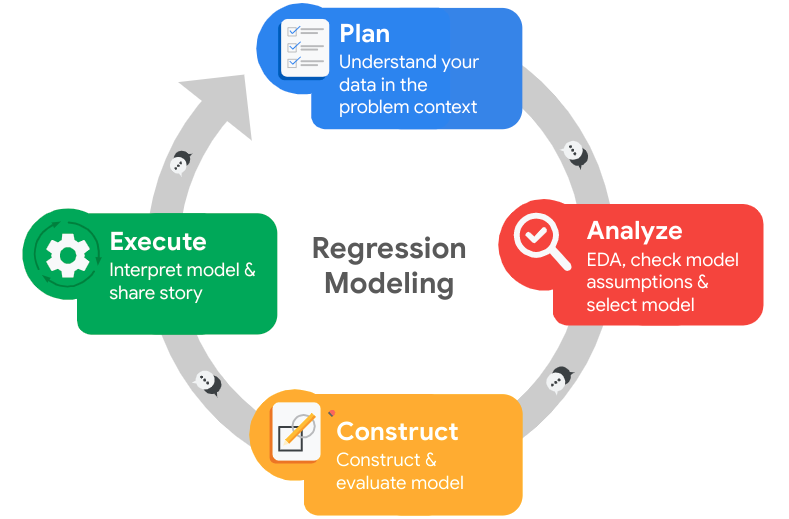

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [128]:
# Importing packages

# Basics Packages
import numpy as np
import pandas as pd

# Data Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  GradientBoostingClassifier, AdaBoostClassifier


# Metrics and Extra functions
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree

# Saving model Results
import os
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [129]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
df = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [130]:
# Gather basic information about the data
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [131]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [132]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [133]:
# Rename columns as needed
df = df.rename(columns={'Work_accident'         : 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company'  : 'tenure',
                          'Department'          : 'department'
                         })
#We want consistent naming conventions to make the work easier


# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [134]:
# Check for missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [135]:
# Check for duplicates
total_dups = df.duplicated().sum()
percentage_dups = total_dups / len(df) * 100

print(f'There are {total_dups} duplicates in the dataset iqual to {percentage_dups}% of the dataset.')


There are 3008 duplicates in the dataset iqual to 20.05467031135409% of the dataset.


In [136]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


Since it is really unlikely that two or more employees respond exactly the same to 10 questions, we will assume they are errors and proceed to drop them.

In [137]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_deduped = df.drop_duplicates(keep='first') #we only want to keep the first value for each duplicate

# Display first few rows of new dataframe as needed
df_deduped.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

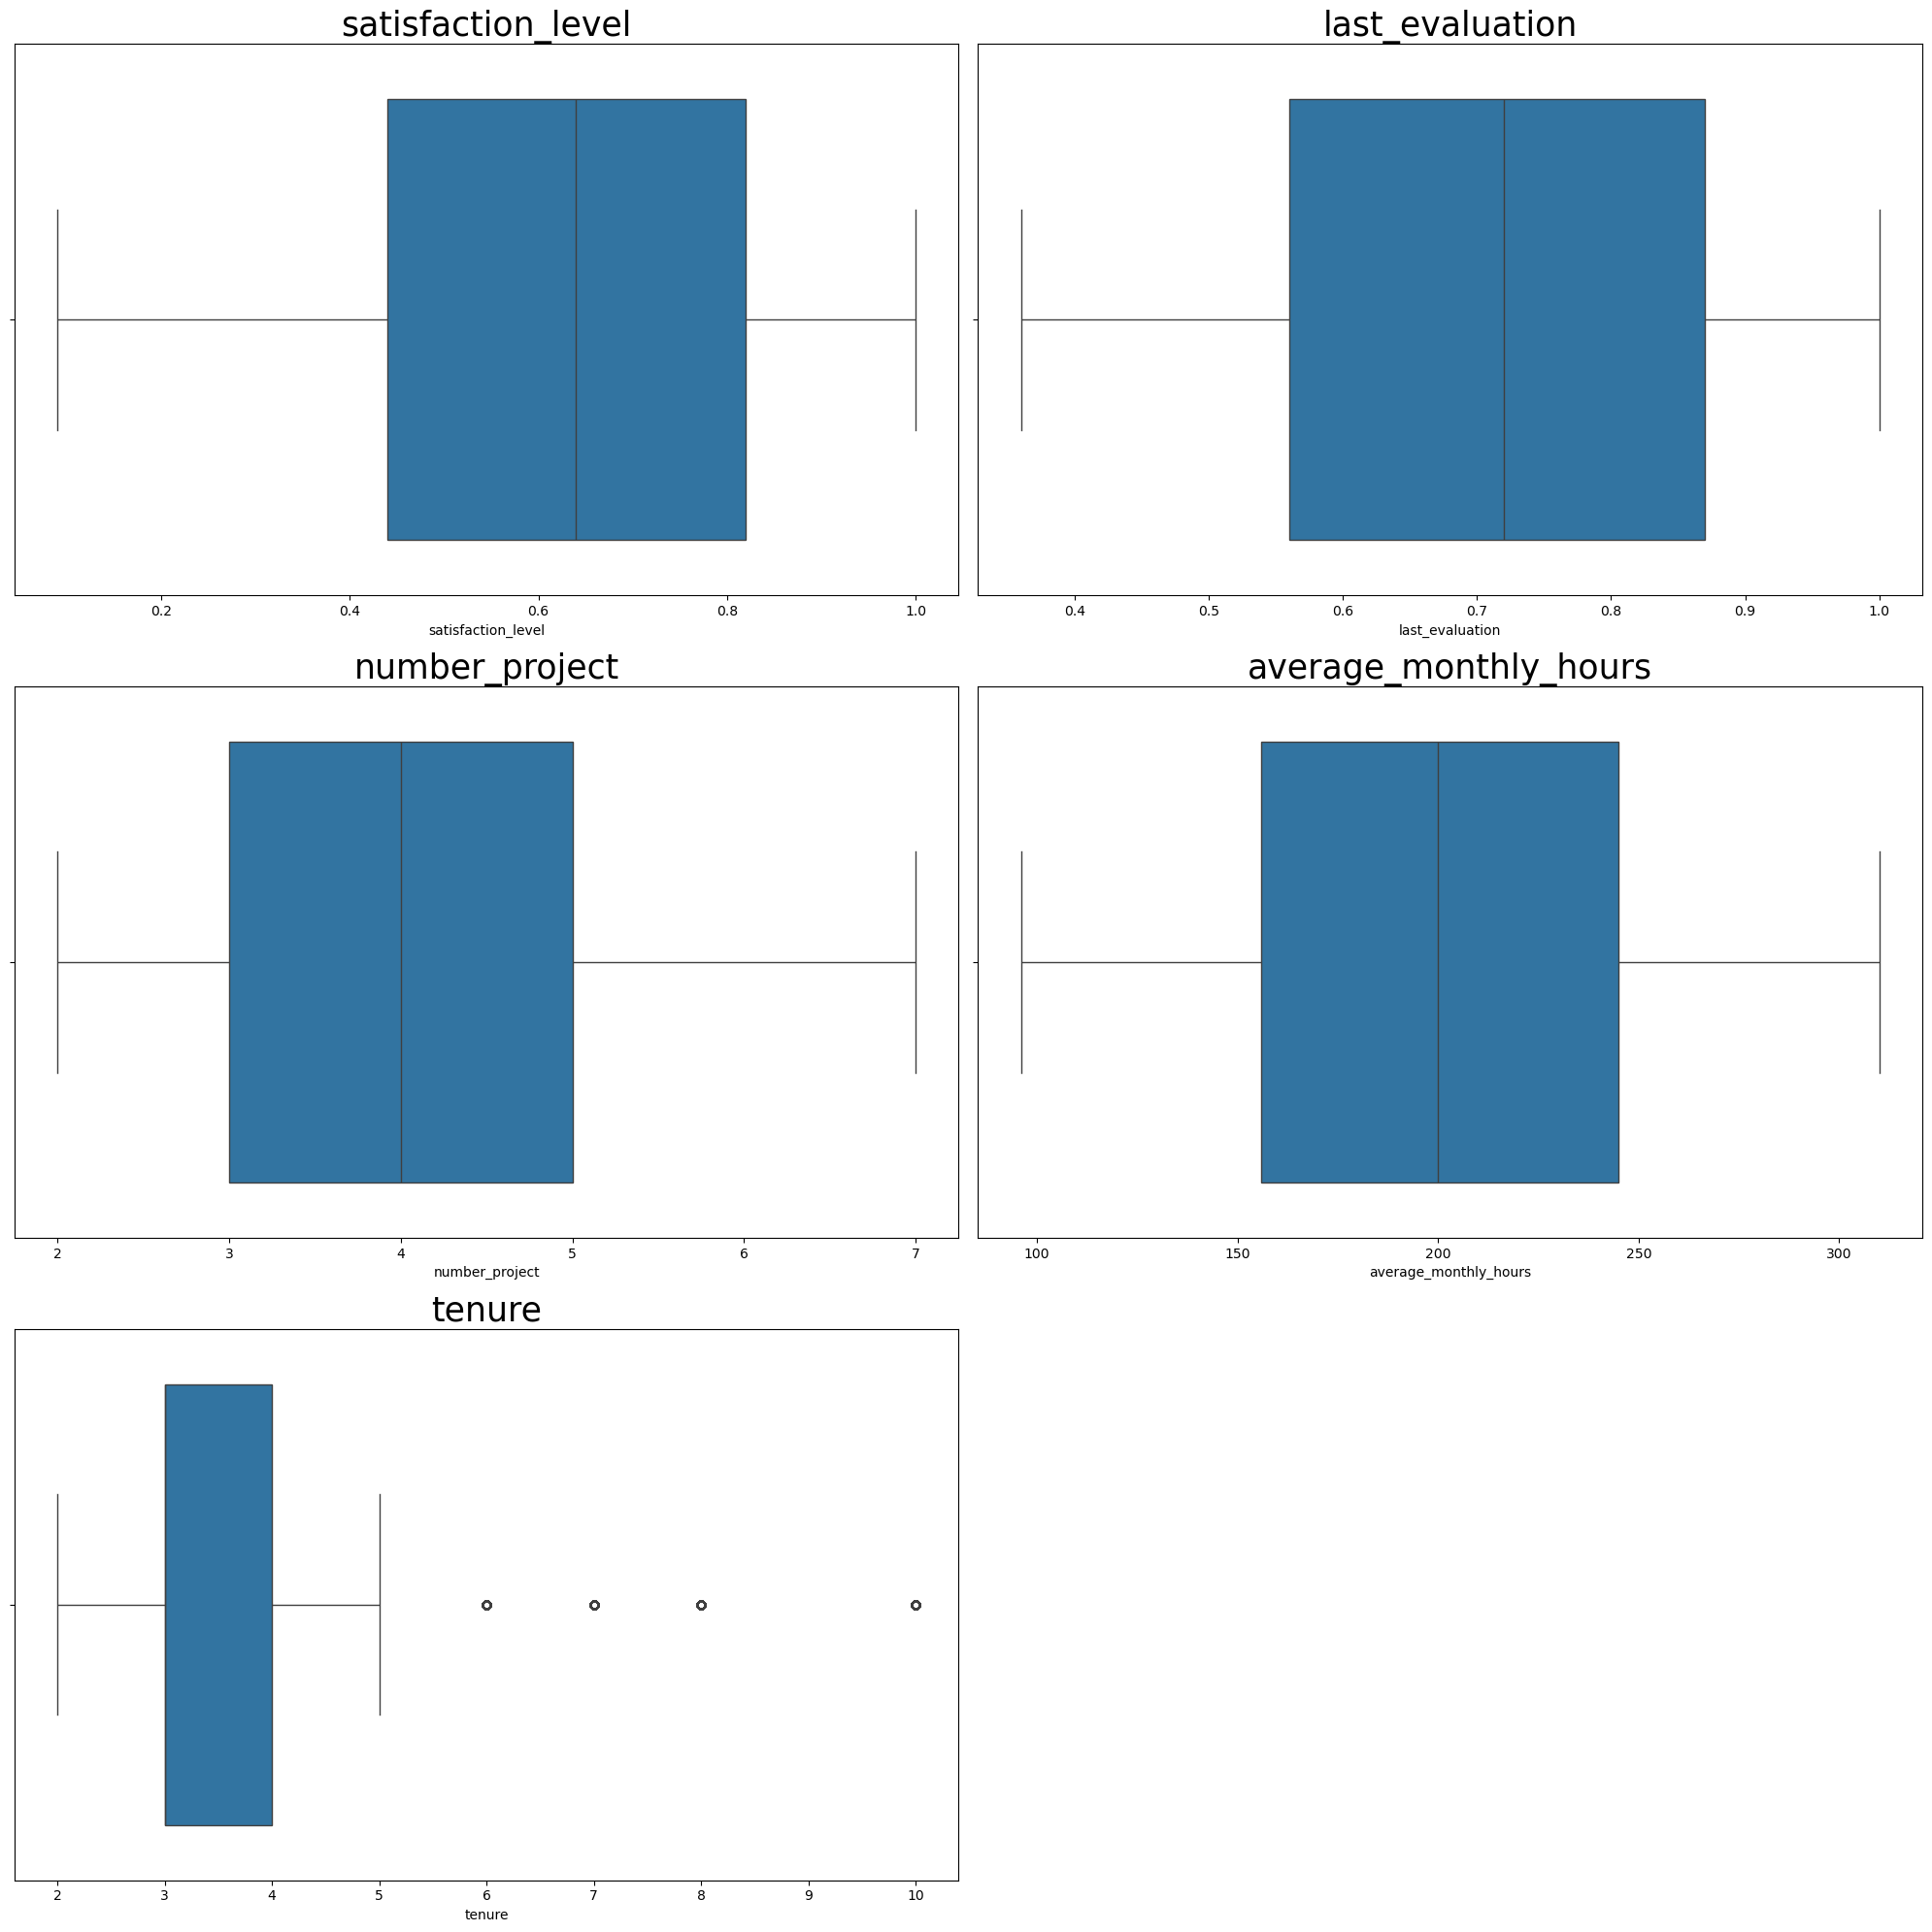

In [138]:
plt.figure(figsize=(20, 20))

for i, col_name in enumerate(df.columns):
    if i <=4:
        plt.subplot(3, 2, i+1)
        sns.boxplot(data= df[col_name],orient='h')
        plt.title(col_name,fontsize='25' )

plt.tight_layout()
plt.show()


From the nine initial predictive variables, the first five are numeric variables, and four out of five do not contain outliers.

In this case, we discovered that tenure is the only variable with outliers.

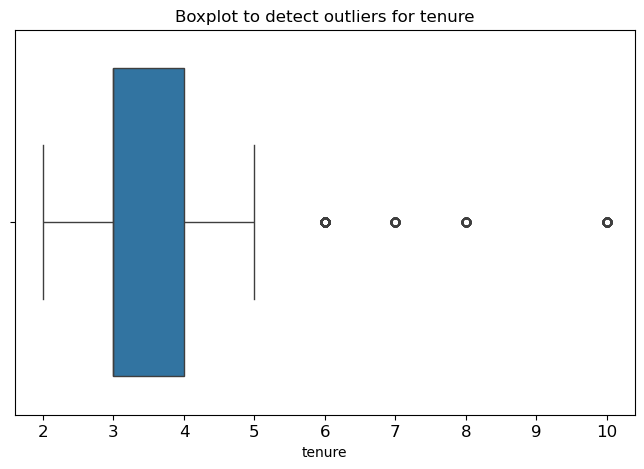

In [139]:
plt.figure(figsize=(8,5))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df_deduped['tenure'])
plt.show()

In [140]:
# Determine the number of rows containing outliers

#IQR METHOD
# Computing the 25th percentile value for `tenure`
Q1 = df_deduped['tenure'].quantile(0.25)

# Computing the 75th percentile value
Q3 = df_deduped['tenure'].quantile(0.75)

# Compute the interquartile range
iqr = Q3 - Q1

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

print(f'''
Lower limit:{lower_limit}
Upper limit:{upper_limit}''')

# Identify subset of data containing outliers in `tenure`
outliers = df_deduped[(df_deduped['tenure'] > upper_limit) | (df_deduped['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print(f"Num of outliers in 'tenure': {len(outliers)} out of {len(df_deduped)}")

#Alternative (less efficient):
#print("Num of outliers in 'tenure':",(outliers.tenure.count()))


Lower limit:1.5
Upper limit:5.5
Num of outliers in 'tenure': 824 out of 11991


**Checking For Unexpected Values in categorical features**

In [141]:
df_deduped['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

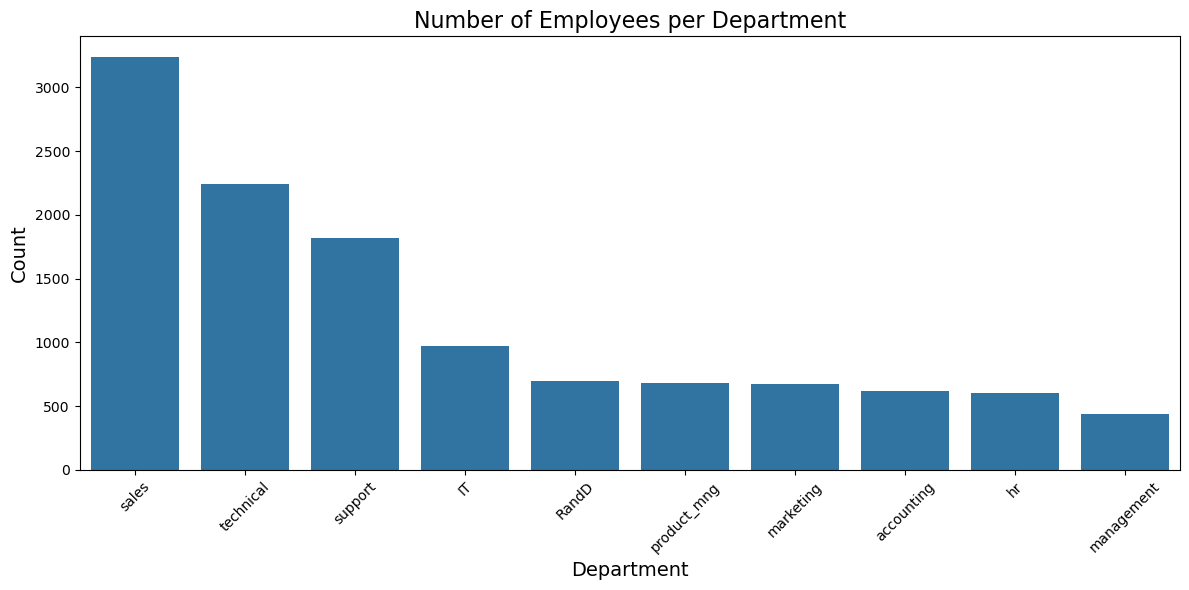

In [142]:
# Get value counts
dept_counts = df_deduped['department'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=dept_counts.index, y=dept_counts.values)

plt.title('Number of Employees per Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [143]:
df_deduped['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

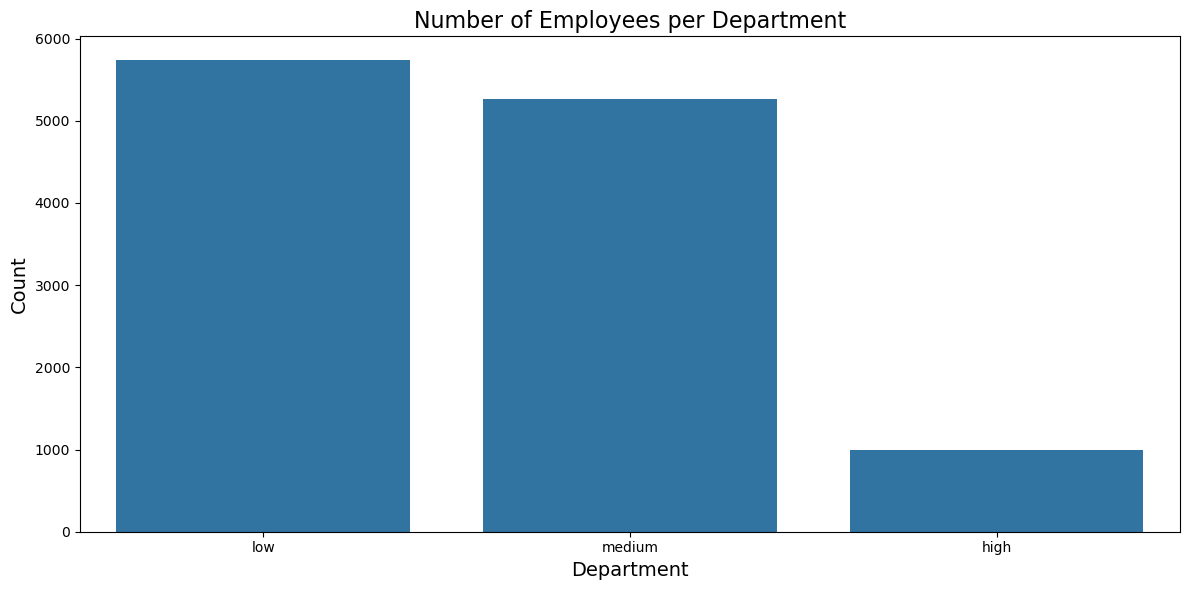

In [144]:
# Get value counts
salary_counts = df_deduped['salary'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=salary_counts.index, y=salary_counts.values)

plt.title('Number of Employees per Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Count', fontsize=14)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [145]:
# Get numbers of people who left vs. stayed
print(df_deduped['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df_deduped['left'].value_counts(normalize=True))



left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Let's start by analyzing the relationship between `number_project` whether or not an employee left the company.

Then a boxplot for the `average_monthly_hours` is generated to compare the distribution of average hours and `number_project`

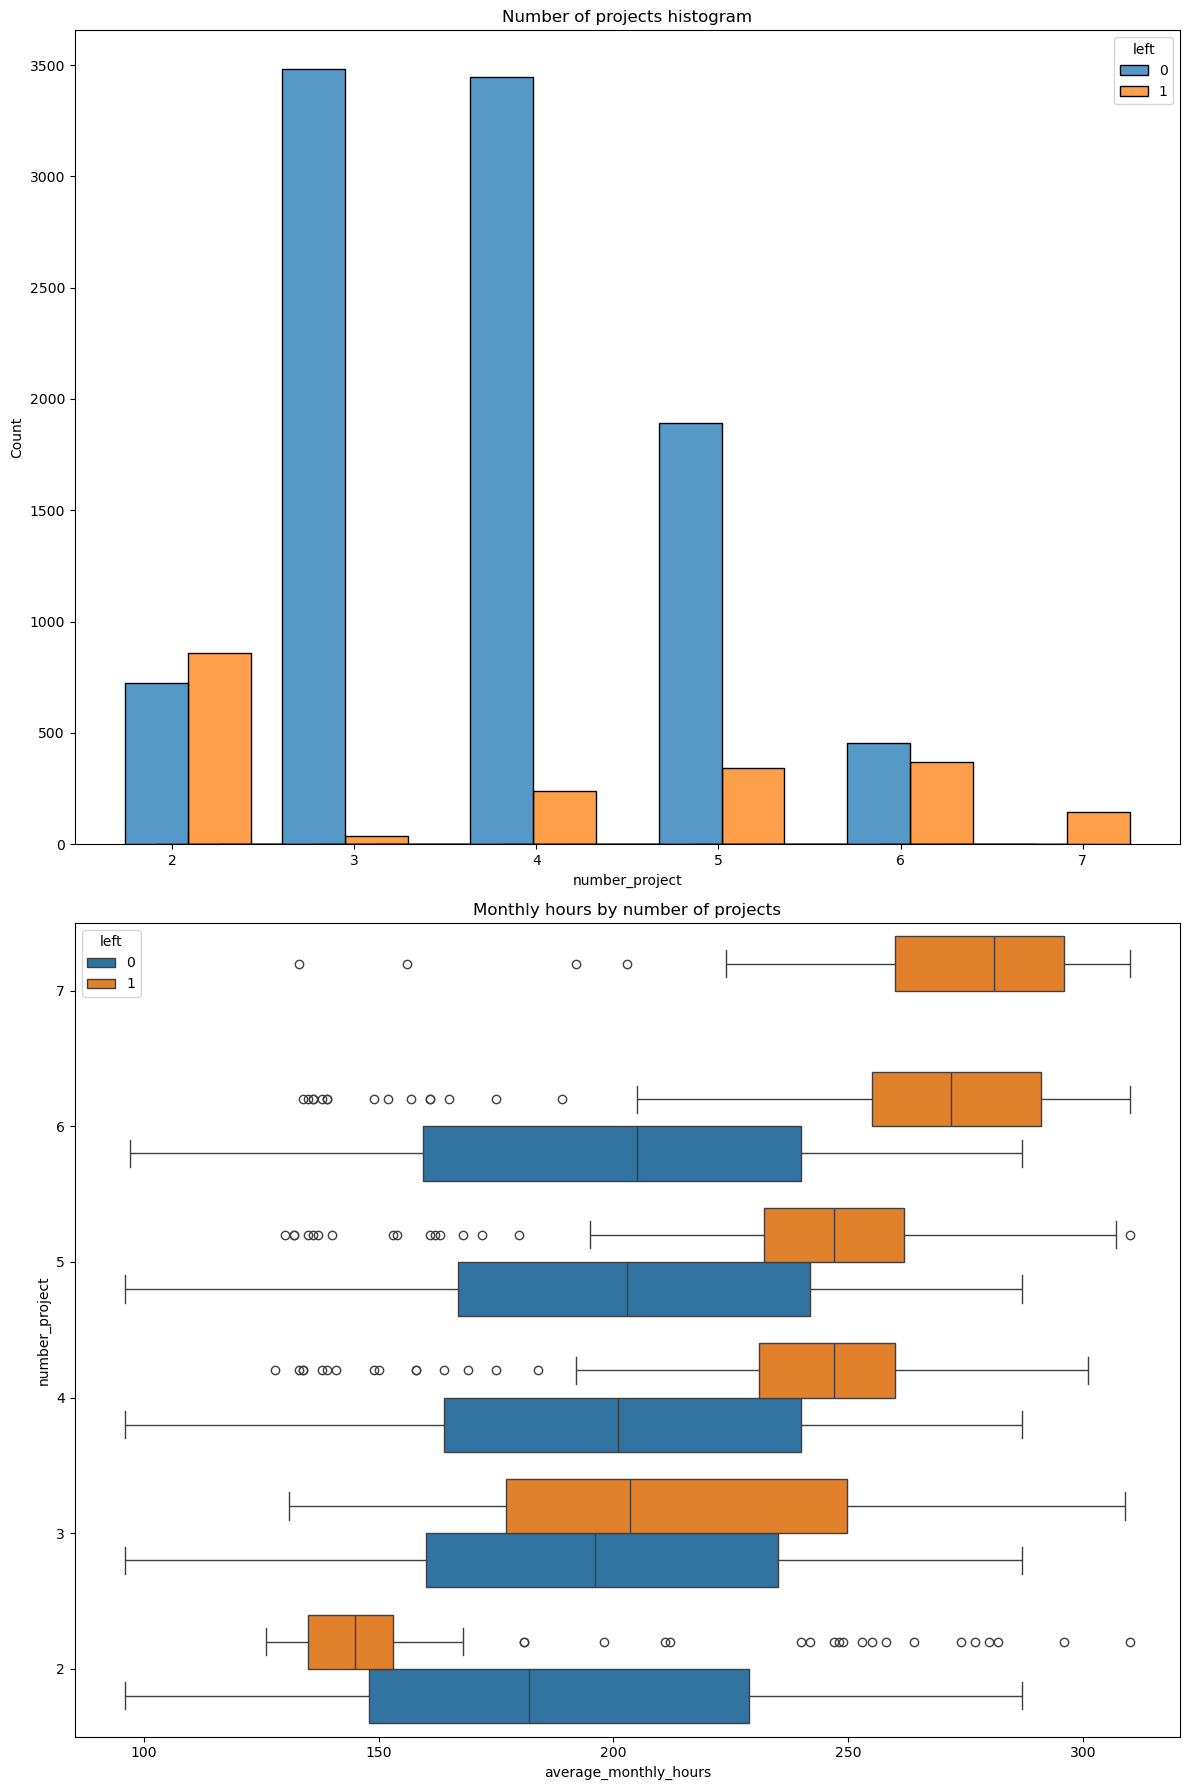

In [146]:

fig, ax = plt.subplots(2, 1, figsize = (12,18))

# Creating distribution of `number_project` to compare employees who stayed vs those who left
sns.histplot(data     =df_deduped,
             x        ='number_project',
             hue      ='left',
             multiple ='dodge',
             shrink   =4,
             ax       =ax[0])
ax[0].set_title('Number of projects histogram')


# Creating boxplot showing `average_monthly_hours` distributions for `number_project`,
# to compare employees who stayed vs those who left
sns.boxplot(data   =df_deduped,
            x      ='average_monthly_hours',
            y      ='number_project',
            hue    ='left',
            orient ="h",
            ax     =ax[1])
ax[1].invert_yaxis()
ax[1].set_title('Monthly hours by number of projects')



# Displaying the plots
plt.tight_layout()
plt.show()

It's expected that employees with more projects work more hours and that trend generally is true here. But a few unusual patterns stand out.

Among those who left the company, there are two clear groups:

* Group A: Employees who worked far fewer hours than others with the same number of projects. They might have been let go or were already planning to leave and had their hours reduced.

* Group B: Employees who worked much more than their coworkers. These workers probably quit because of burnout. They may have carried a heavy load and been key contributors to their teams.

Notably, every employee who had seven projects left, and those with six also worked extremely long hours—often 255 to 295 hours per month, which is well above normal.

The sweet spot seems to be 3–4 projects. Very few employees with that workload left the company.

For reference, a standard full-time job is about 167 hours/month. Almost all employees here—even the ones who stayed—are working well above that, suggesting that overwork is a widespread issue

In [147]:
df_deduped[df_deduped['number_project']==7]['left'].value_counts()


left
1    145
Name: count, dtype: int64

The next step is to compare the satisfaction of employees with the average number of hours they put in at work, then compare it to the results from the previous year.

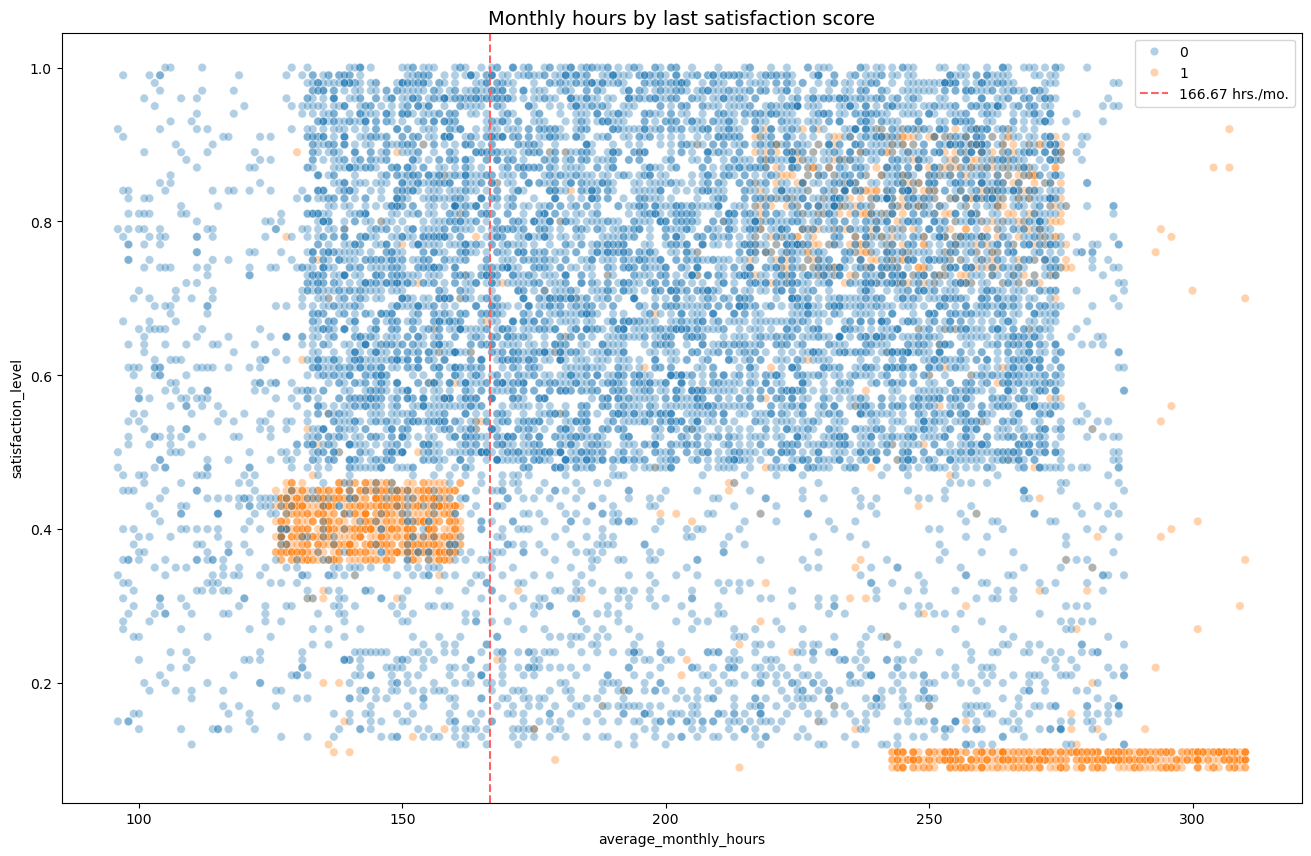

In [148]:
# Creating a scatterplot of `average_monthly_hours` versus `satisfaction_level`
# to compare employees who stayed vs those who left

plt.figure(figsize=(16, 10))

sns.scatterplot(data= df_deduped,
                x   = 'average_monthly_hours',
                y   = 'satisfaction_level',
                hue = 'left', alpha=0.35)

plt.axvline(x    = 166.67,
            color= '#ff6361',
            label= '166.67 hrs./mo.',
            ls   = '--')

#this order of labels is manual, update if needed
plt.legend()

plt.title('Monthly hours by last satisfaction score', fontsize='14');

The scatterplot shows a large group of employees working between 240 and 315 hours per month—with 315 being over 75 hours a week all year. These employees had very low satisfaction, close to zero.

Another group of employees who left had more normal hours, but their satisfaction was still low, around 0.4. It’s hard to say why they left, but they may have felt pressure to work more, which could have affected their satisfaction.

There’s also a group working 210 to 280 hours per month with high satisfaction (around 0.7 to 0.9).

Lastly, the unusual shape of the data suggests it might have been manipulated or artificially created given the symmetrical shape



Text(0.5, 1.0, 'Monthly hours by last performance score')

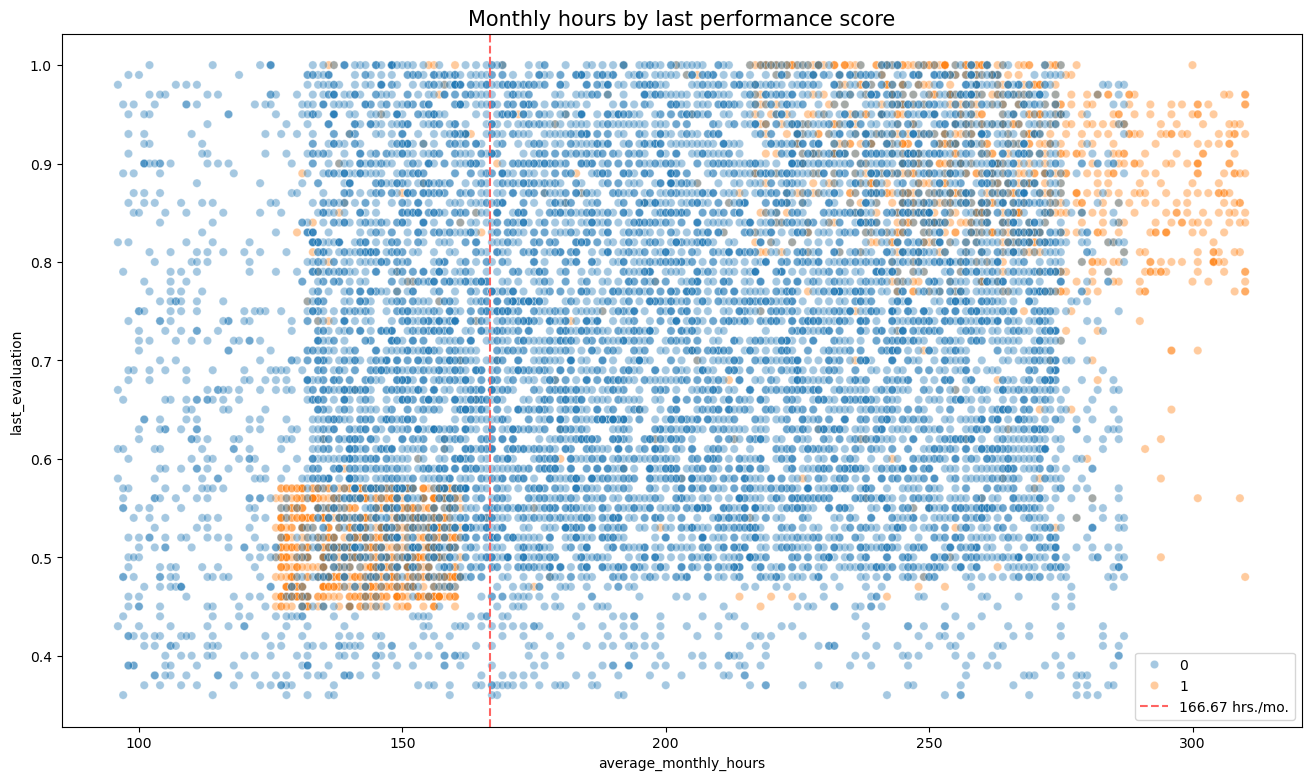

In [149]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data =df_deduped,
                x    ='average_monthly_hours',
                y    ='last_evaluation',
                hue  ='left', alpha=0.4)

plt.axvline(x=166.67, 
            color='#ff6361',
            label='166.67 hrs./mo.',
            ls='--')

plt.legend()
plt.title('Monthly hours by last performance score', fontsize='15')

In this case, this shows two main groups of employees who left the company. One group had high performance scores but were likely overworked. The other group had lower performance and worked less than the average 166.67 hours per month.

Interestingly, employees who had the lowest performance and had previously left are no longer visible in this data. Now, we mostly see two types of people who left: a tight group with around 50% performance, and a larger group of high performers who seem to have worked too much.

There seems to be a link between working more hours and getting higher evaluation scores, but not always. working long hours doesn’t guarantee a good review. In fact, there aren’t many employees who worked a lot and still got low scores.

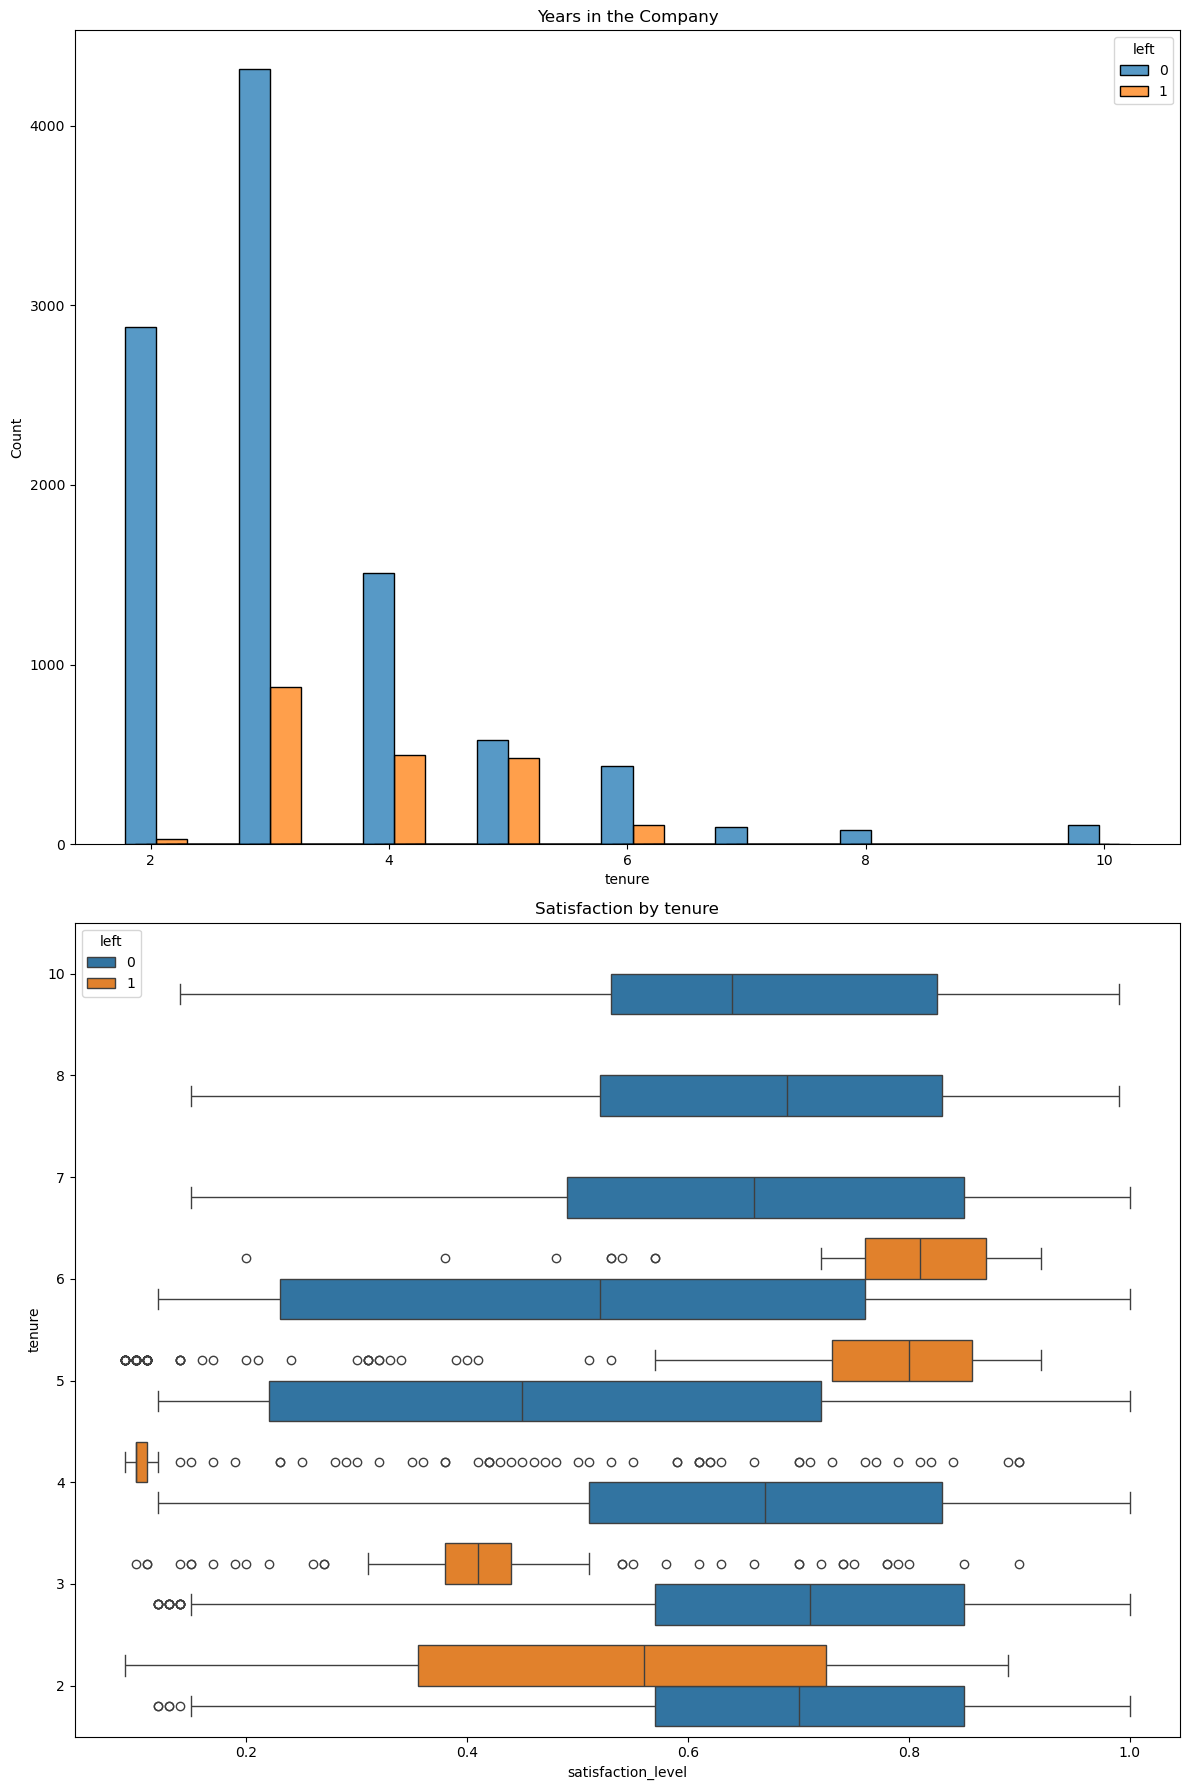

In [150]:
# Set figure and axes
fig, ax = plt.subplots(2, 1, figsize = (12,18))

# Creating a histogram showing distribution of `tenure` to
# compare employees who stayed versus those who left
tenure_stay = df_deduped[df_deduped['left']==0]['tenure']
tenure_left = df_deduped[df_deduped['left']==1]['tenure']
sns.histplot(data=df_deduped,
             x='tenure',
             hue='left',
             multiple='dodge', # side by side bars
             shrink=6,         #bar width
             ax=ax[0])
ax[0].set_title('Years in the Company')


# Creating a boxplot for the `satisfaction_level` by tenure to
# compare employees who stayed versus those who left
sns.boxplot(data  = df_deduped,
            x     = 'satisfaction_level',
            y     = 'tenure',
            hue   = 'left',
            orient= "h",        #horizontal Position
            ax    = ax[1])
ax[1].invert_yaxis()
ax[1].set_title('Satisfaction by tenure')


# Displaying the plots
plt.tight_layout()
plt.show();


These plots reveal a few key patterns from another angle:

Employees who left the company generally fall into two groups: those who were unhappy and had shorter tenures, and those who were very satisfied but had been at the company for a few years. Interestingly, employees with four years of experience who left had especially low satisfaction. It may be helpful to look into whether any company policies changed around that time.

Employees with the longest tenure didn't leave, and their satisfaction was similar to that of newer employees who stayed. The histogram also shows that there aren't many long-tenured employees—possibly because these roles are more senior or better paid.

In [151]:
# Calculate mean and median satisfaction scores
df_deduped.groupby(['left'])['satisfaction_level'].agg(["mean","median"])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Employees who left the company had lower average and median satisfaction scores compared to those who stayed. Interestingly, for employees who stayed, the mean satisfaction score is slightly lower than the median. This suggests that their satisfaction levels are skewed to the left—in other words, while many employees are quite satisfied, there are some with much lower satisfaction pulling the average down.

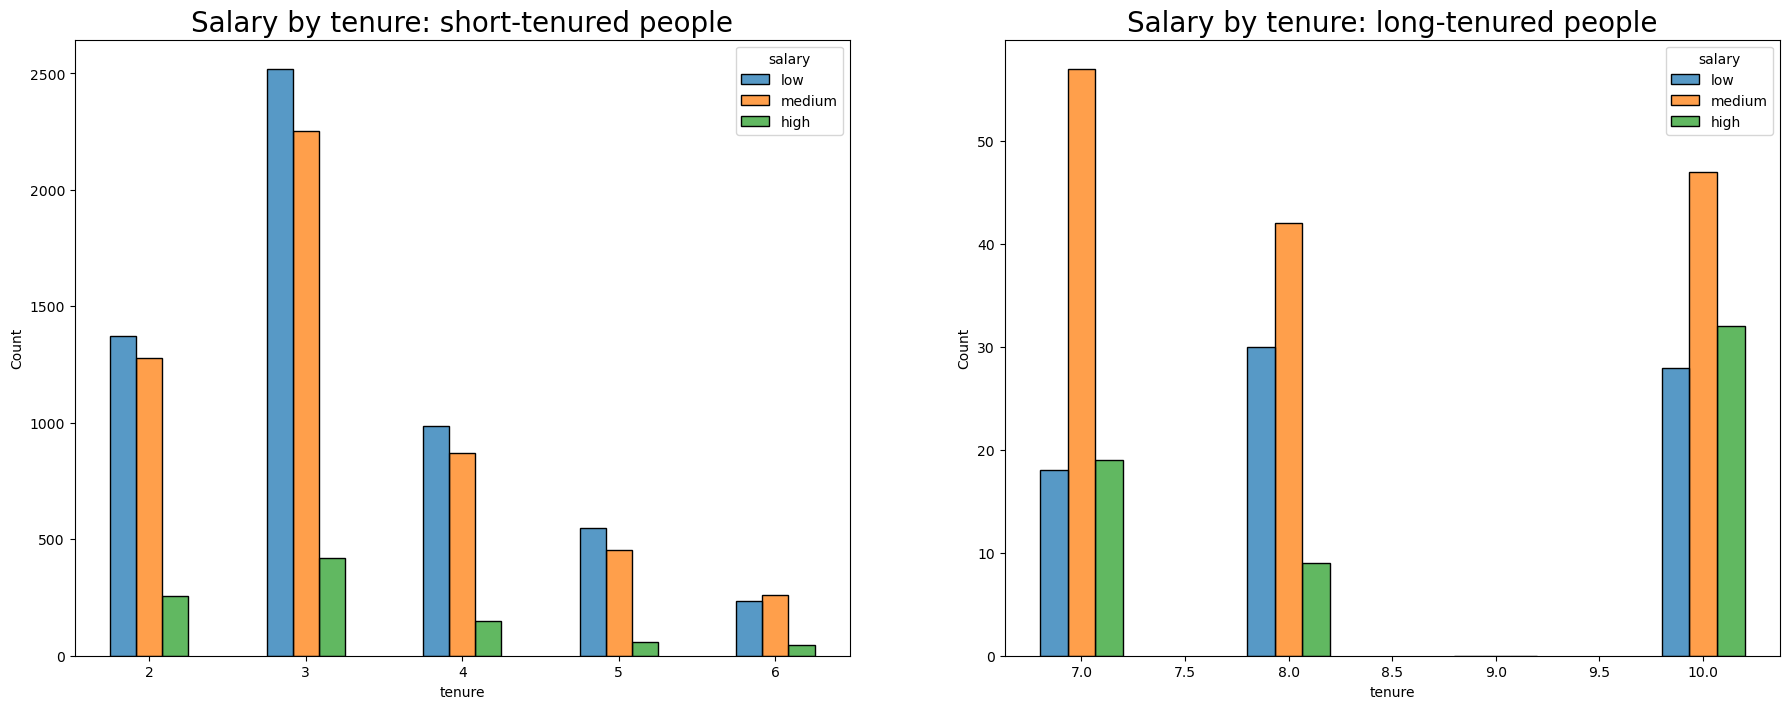

In [152]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-timer employees
tenure_short = df_deduped[df_deduped['tenure'] < 7]
# Define long-timer employees
tenure_long = df_deduped[df_deduped['tenure'] > 6]


# Plot short-tenured histogram
sns.histplot(data     =tenure_short,
             x        ='tenure',
             hue      ='salary',
             discrete =1,
             hue_order=['low', 'medium', 'high'],
             multiple ='dodge',
             shrink   =0.5, ax= ax[0])
ax[0].set_title('Salary by tenure: short-tenured people',fontsize='20')

# Plot long-tenured histogram
sns.histplot(data     =tenure_long,
             x        ='tenure',
             hue      ='salary',
             discrete =1,              # Center bars
             hue_order=['low', 'medium', 'high'],
             multiple ='dodge',
             shrink   =.4, ax= ax[1])
ax[1].set_title('Salary by tenure: long-tenured people', fontsize='20');


The plots above show that long-tenured employees were not mostly made up of higher-paid staff.

As a next step, it might be helpful to explore whether there’s a relationship between working long hours and getting high performance evaluations. To do this, you could create a scatterplot comparing `average_monthly_hours` and `last_evaluation`.

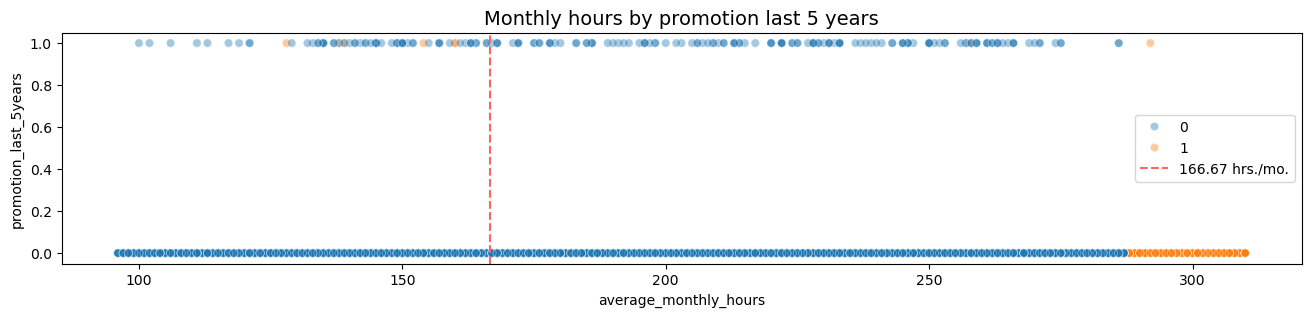

In [153]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))

sns.scatterplot(data =df_deduped,
                x    ='average_monthly_hours',
                y    ='promotion_last_5years',
                hue  ='left', alpha=0.4)
plt.axvline(x=166.67,
            color='#ff6361',
            ls='--',
            label='166.67 hrs./mo.')
plt.legend()
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

In [154]:
#number of employees by department
df_deduped["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

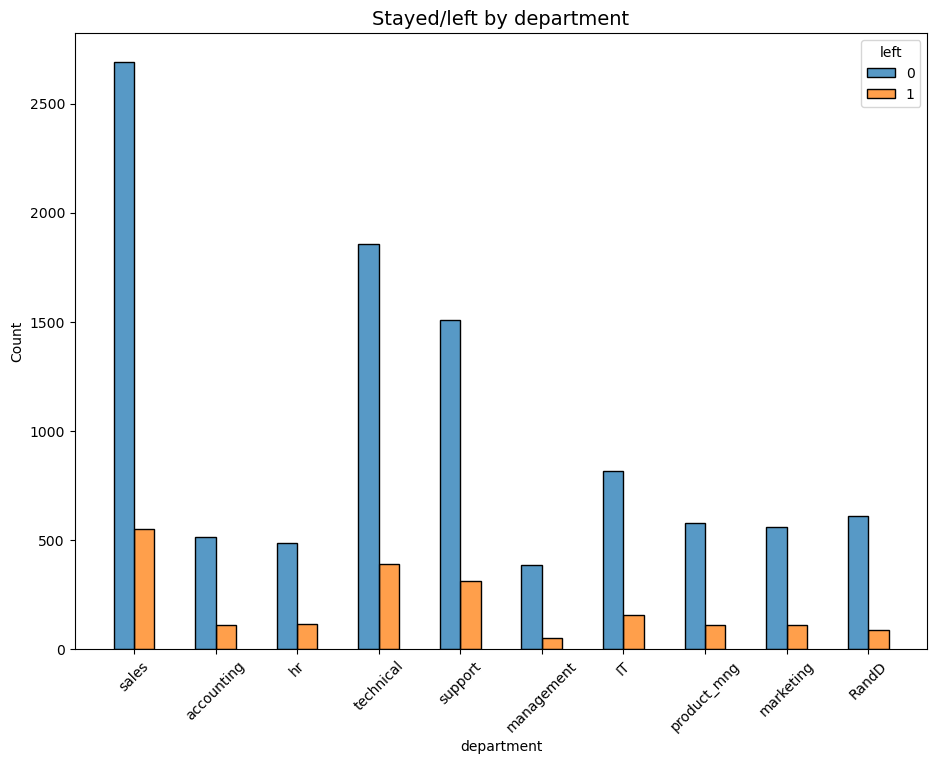

In [155]:
# Create stacked histogram to compare department distribution of employees who left to
#that of employees who didn't
plt.figure(figsize=(11,8))

sns.histplot(data=df_deduped,
             x        ='department',
             hue      ='left',
             discrete =1,
             hue_order=[0, 1],
             multiple ='dodge',
             shrink   =.5)
plt.xticks(rotation=45)
plt.title('Stayed/left by department', fontsize=14);


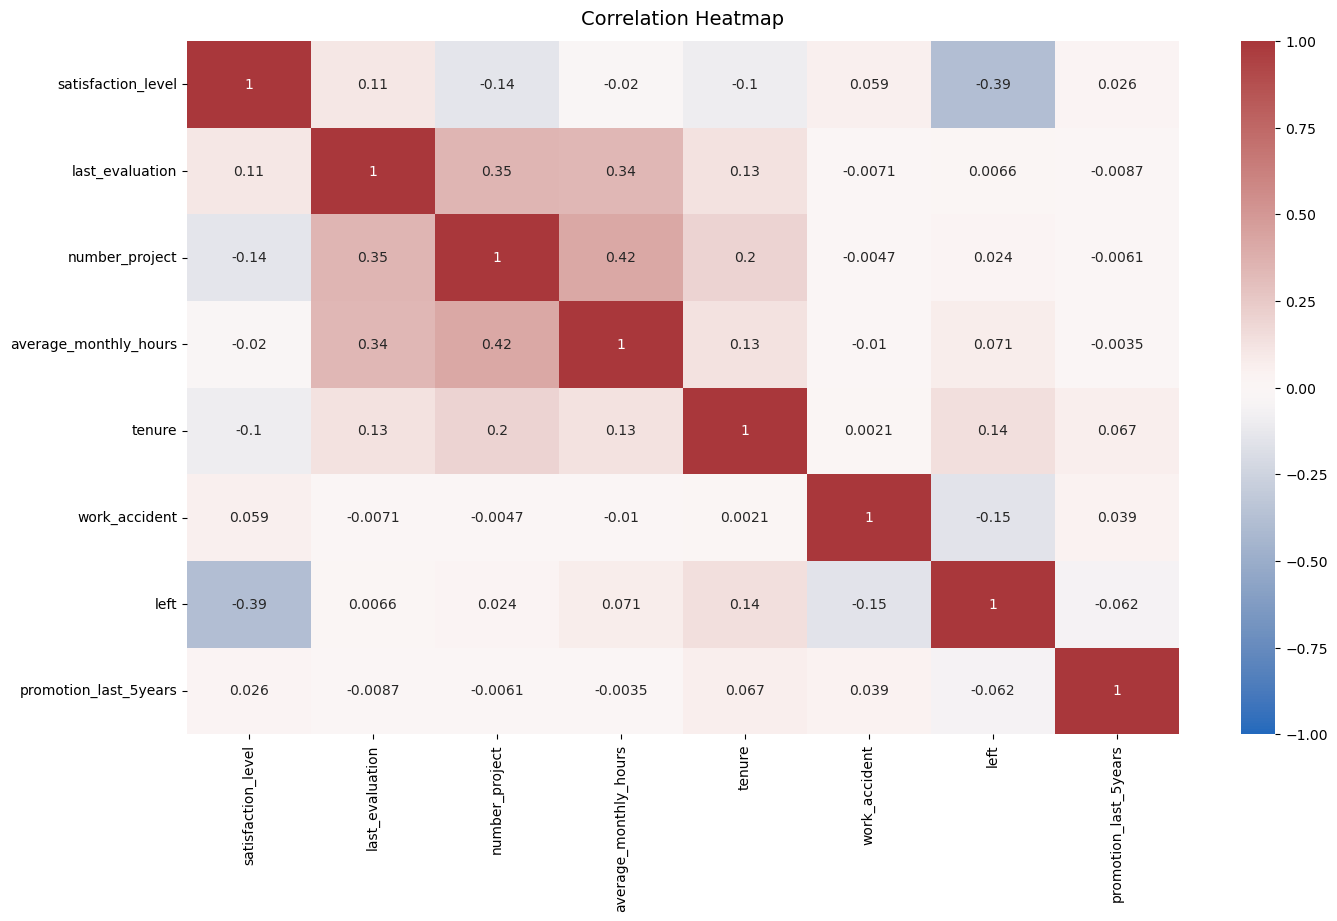

In [156]:
#Ploting Heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.select_dtypes(include='number').corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

The correlation heatmap clearly shows something important: the number of projects, monthly working hours, and evaluation scores all tend to increase together. In other words, employees who work on more projects usually work longer hours and get better evaluations.

At the same time, whether an employee leaves the company is closely linked to their satisfaction level — the less satisfied they are, the more likely they are to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The objective is to anticipate the departure of an employee from the organization ( a categorical result). Thus, we are working with a classification problem, specifically binary classification. It falls under either 1 (Employee departure) or 0 (Employee retention).

### Identify the types of models most appropriate for this task.

Since the variable you want to predict is categorical, we can build:

- **Logistic Regression:** A simple and interpretable model that can serve as a baseline.

- **Decision Trees:** These are intuitive and can capture non-linear relationships in the data. They can be prone to overfitting.

- **Random Forest:** An ensemble of decision trees that can handle complex relationships and reduce overfitting.

- **Naive Bayes:** Particularly useful when dealing with text data or features that can be treated as probabilities.

- **Ensemble Methods:** can often lead to improved performance and robustness.

- **Gradient Boosting:** Offer powerful performance by combining multiple weak learners.


### Encoding non-numeric variable

We have two variables that are not numerical: department and salary.

`department` is a categorical varaible and we can be transformed into dummy variables for the purpose of modeling.

`salary` is also categorical, but it is ordinal(Ranked by importance). </br>

The categories hold a certain business logic and to conserve it, it is important to avoid using dummy variables for this column. Instead, we are going to convert  the levels into numerical values ranging from 0 to 2 (with 2 being the highest value).

In [157]:
df_encoded = df_deduped.copy()

# Encoding the `salary` column as an ordinal numeric category
df_encoded['salary'] = (df_encoded['salary'].astype('category')
                       .cat.set_categories(['low', 'medium', 'high']).cat.codes)

# Dummy encode the `department` column
df_encoded = pd.get_dummies(df_encoded, drop_first=False, dtype=int)

# Display the new dataframe
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [158]:
df_collinearity = df_encoded.copy()
df_collinearity = df_collinearity.drop('left',axis= 1)

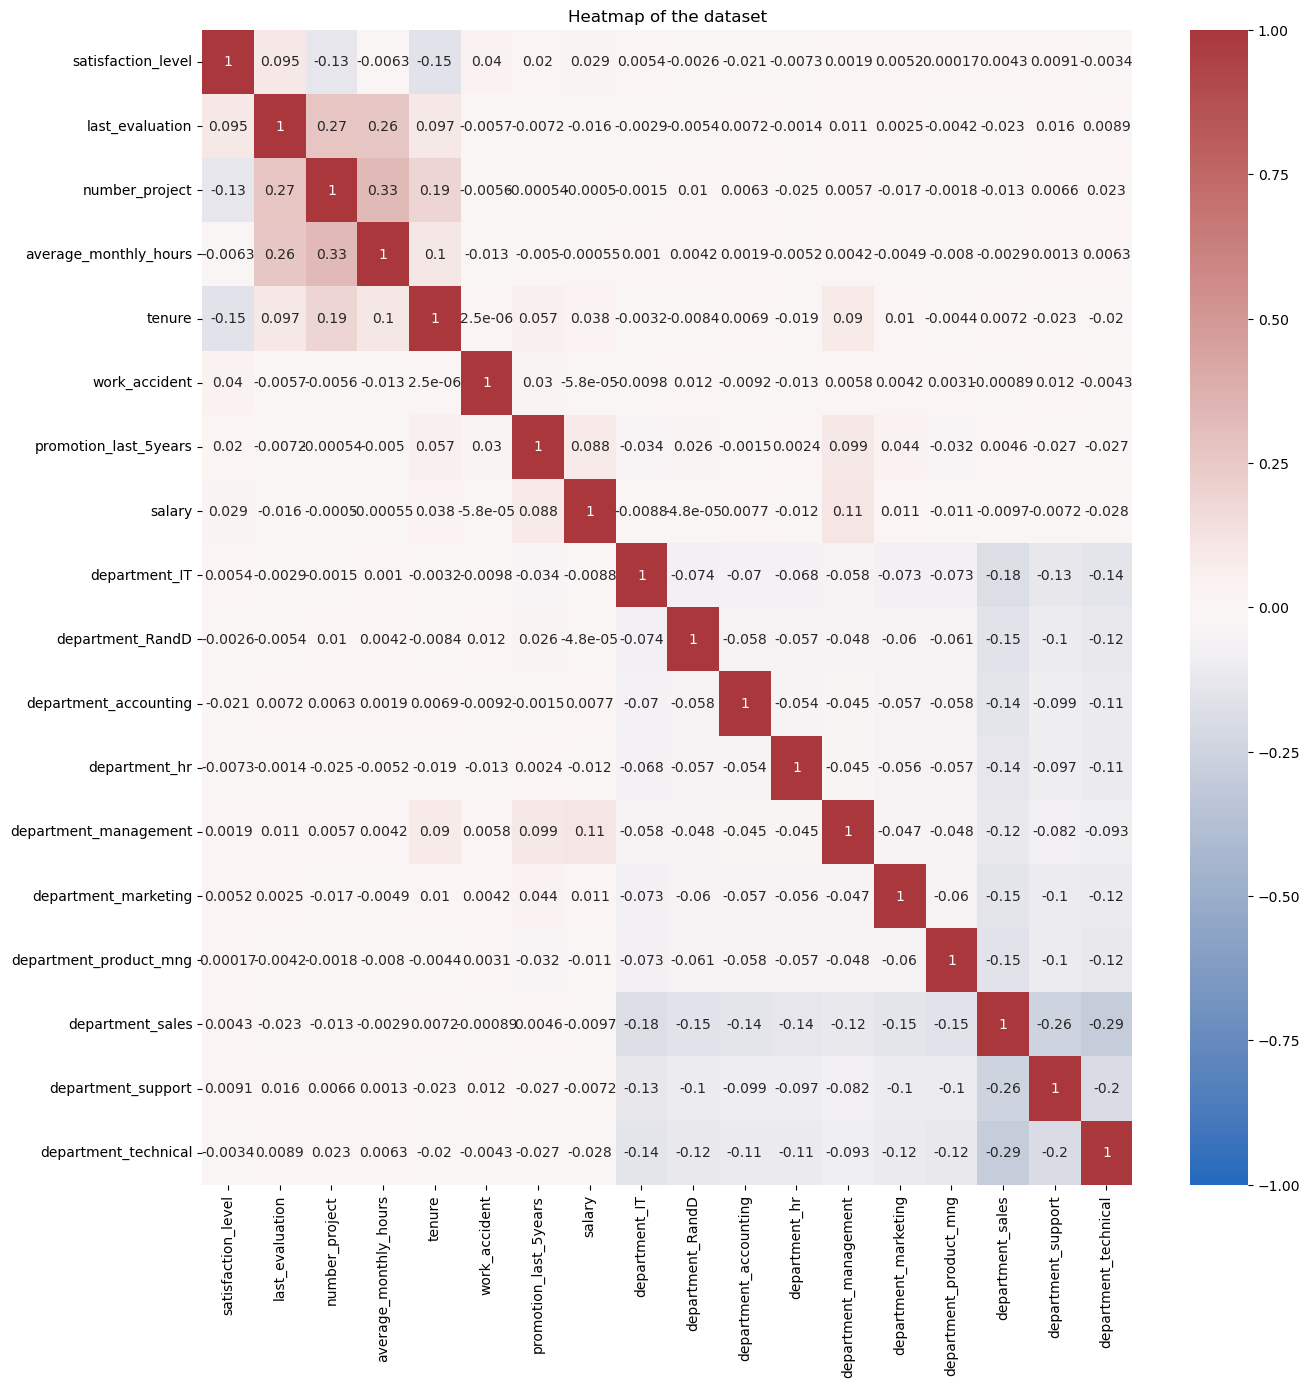

In [159]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_collinearity.corr(),
                        annot=True,vmin= -1, vmax= 1, cmap="vlag")
plt.title('Heatmap of the dataset')
plt.show()

Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't.

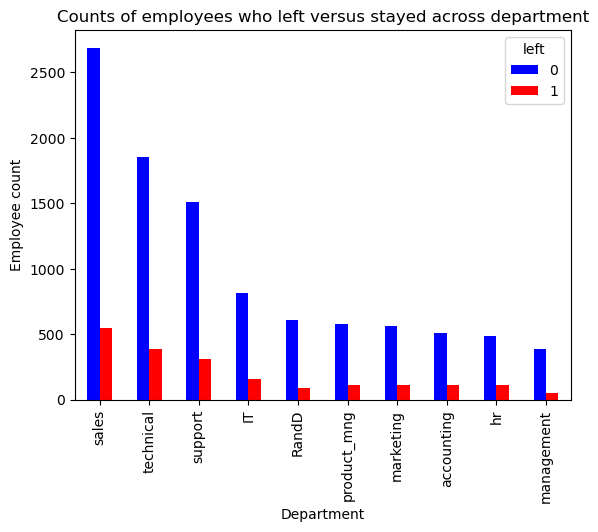

In [160]:
ct = pd.crosstab(df_deduped['department'],df_deduped['left'])

ct_sorted = ct.sort_values(by=0, ascending=False)
ct_sorted.plot(kind ='bar', #bar style
               color='br') # blue and red

plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show();

### Modeling

Add as many cells as you need to conduct the modeling process.

#### 1 - Logistic regression

This is our benchmark Model.

Due to the heightened sensitivity of logistic regression to outliers, it is recommended at this point to eliminate the previously identified outliers in the tenure column.

In [161]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logit = df_encoded[(df_encoded['tenure'] >= lower_limit) & (df_encoded['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logit.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Selecting the Y variable, which is the variable we want to predict.

In [162]:
#selecting our target variable
y = df_logit['left']

# Display first few rows of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Removing the Y variable from the selected X features

In [163]:
x= df_logit.copy()
x = x.drop('left', axis=1)

# Display the first few rows of the selected features
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


Split the data into training set and testing set.

In [164]:
# Split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25,
                                                    stratify        =y,
                                                    random_state    =42)

Construct a logistic regression model and fit it to the training dataset.

In [165]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500,).fit(x_train, y_train)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/miniconda3/lib/python3.12/site-packag

Using the model to make predictions on the test set.

In [166]:
y_pred = log_clf.predict(x_test)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Time for a confusion matrix to visualize the results of the logistic regression model.

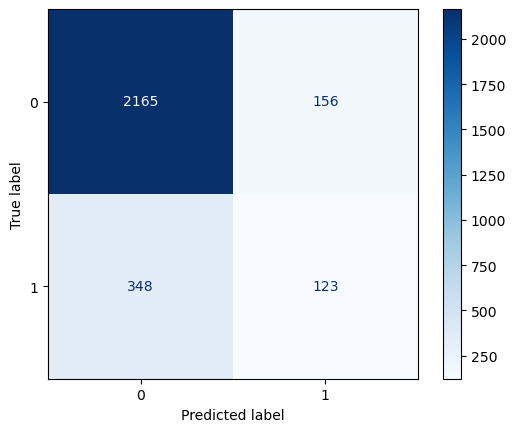

In [167]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='', cmap= "Blues")

# Display plot
plt.show()

The confusion matrix shows how well the model made its predictions. Each section of the matrix tells a different story:

* Top-left (True Negatives): These are people who stayed, and the model correctly predicted that they would stay.

* Top-right (False Positives): These are people who stayed, but the model incorrectly predicted that they would leave.

* Bottom-left (False Negatives): These are people who left, but the model incorrectly predicted that they would stay.

* Bottom-right (True Positives): These are people who left, and the model correctly predicted that they would leave.

A perfect model would get only true positives and true negatives  (basically no incorrect predictions at all.)



In [168]:
df_logit['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

The distribution is divided roughly 83% to 17%, this is considered slightly imbalanced but we can work with this data wihtout having to change the class balance.

In [169]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The provided classification report indicates that the logistic regression model attained weighted average precision, recall, and f1-score of 79%, 82%, and 80%, respectively, along with an accuracy of 82%.

Nevertheless, a crucial consideration arises regarding whether it is more important to correctly classify employees who have remained with the company or those who have departed.

If we are intered on predicting departing employees, then the scores for this model are significantly lower.

#### 2 - Tree-based Models:

#### A) Decision Trees:

Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters

Selecting the Y variable, which is the variable we want to predict.

In [170]:
#selecting our target variable
y = df_encoded['left']

# Display first few rows of the outcome variable
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Removing the Y variable from the selected X features

In [171]:
x = df_encoded.copy()
x = x.drop('left', axis=1)

# Display the first few rows of the selected features
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [172]:
# Split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25,
                                                    stratify        =y,
                                                    random_state    =42)

In [173]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [174]:
%%time
tree1.fit(x_train, y_train)

CPU times: user 1.4 s, sys: 15.9 ms, total: 1.41 s
Wall time: 1.42 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Identify the optimal values for the decision tree parameters.

In [175]:
# Check best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

Identify the best AUC score achieved by the decision tree model on the training set.

In [176]:
# Check best AUC score on CV
tree1.best_score_

np.float64(0.9758952535925409)

In [177]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

Use the function just defined to get all the scores from grid search.

In [178]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.966878,0.918288,0.941941,0.981208,0.975895


#### B) Random Forest:

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

Selecting the Y variable, which is the variable we want to predict.

In [179]:
#selecting our target variable
y = df_encoded['left']

# Display first few rows of the outcome variable
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Removing the Y variable from the selected X features

In [180]:
x = df_encoded.copy()
x = x.drop('left', axis=1)

# Display the first few rows of the selected features
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [181]:
# Split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25,
                                                    stratify        =y,
                                                    random_state    =42)

In [182]:
# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the Random Forest model to the training data.

In [183]:
# %%time
# rf1.fit(x_train, y_train) # --> Wall time: ~10min

Saving the results - Specify path to where you want to save your model.

In [184]:
# Define a path to the folder where you want to save the model
path = './pickles/'

Define functions to pickle the model and read in the model.

In [185]:
def write_pickle(path, model_object, save_as:str):
    '''
    In:
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [186]:
def read_pickle(path, saved_model_name:str):
    '''
    In:
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out:
        model: the pickled model
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

Use the functions defined above to save the model in a pickle file and then read it in.

In [187]:
# # Write pickle
# write_pickle(path, rf1, 'rf1')

In [188]:
# Read pickle
rf1 = read_pickle(path, 'rf1')
print(rf1)

hasattr(rf1, 'best_score_') 

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})


True

Identify the best AUC score achieved by the random forest model on the training set.

In [189]:
# Check best AUC score on CV
rf1.best_score_

np.float64(0.9821774263690365)

Identify the optimal values for the parameters of the random forest model.

In [190]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [191]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.966878  0.918288  0.941941  0.981208  0.975895
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.945895  0.912254  0.928698   0.97676  0.982177


#### 3 - K-Nearest Neighbors (KNN):


Selecting the Y variable, which is the variable we want to predict.

In [192]:
#selecting our target variable
y = df_encoded['left']

# Display first few rows of the outcome variable
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Removing the Y variable from the selected X features

In [193]:
x= df_encoded.copy()
x = x.drop('left', axis=1)

# Display the first few rows of the selected features
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [194]:
# Split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25,
                                                    stratify        =y,
                                                    random_state    =42)

In [195]:
# Instantiate model
knn = KNeighborsClassifier()

# Assign a dictionary of hyperparameters to search over
cv_params = {'n_neighbors': [3, 5, 7, 10],
             'weights': ['uniform', 'distance'],
             'p': [1, 2],
             'leaf_size': [20, 30, 40],
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
knn1 = GridSearchCV(knn, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [196]:
# %%time
# knn1.fit(x_train, y_train) # --> Wall time: ~20min

Use the functions defined above to save the model in a pickle file and then read it in.

In [197]:
# # Write pickle
# write_pickle(path, knn1, 'knn1')

In [198]:
# Read pickle
knn1 = read_pickle(path, 'knn1')

Identify the optimal values for the decision tree parameters.

In [199]:
# Check best parameters
knn1.best_params_

{'leaf_size': 20, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

Identify the best AUC score achieved by the decision tree model on the training set.

In [200]:
# Check best AUC score on CV
knn1.best_score_

np.float64(0.9582485144776898)

Use the function make_results to get all the scores from grid search.

In [201]:
# Get all CV scores
knn1_cv_results = make_results('kn neighbors cv', knn1, 'auc')

print(tree1_cv_results)
print(rf1_cv_results)
print(knn1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.966878  0.918288  0.941941  0.981208  0.975895
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.945895  0.912254  0.928698   0.97676  0.982177
             model  precision    recall       F1  accuracy       auc
0  kn neighbors cv   0.811151  0.884118  0.84598  0.946513  0.958249


#### 4 - Boosting Algorithms

#### A) Gradient Boosting:


Selecting the Y variable, which is the variable we want to predict.

In [202]:
#selecting our target variable
y = df_encoded['left']

# Display first few rows of the outcome variable
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Removing the Y variable from the selected X features

In [203]:
x= df_encoded.copy()
x = x.drop('left', axis=1)

# Display the first few rows of the selected features
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [204]:
# Split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25,
                                                    stratify        =y,
                                                    random_state    =42)

In [205]:
# Instantiate model
gb = GradientBoostingClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'learning_rate': [0.1, 0.01],
             'n_estimators': [100, 200, 300],
             'max_depth': [3, 5, None],
             'min_samples_split': [2, 3, 4],
             'min_samples_leaf': [1, 2, 3],
             'max_features': ['sqrt', 'log2', None]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
gb1 = GridSearchCV(gb, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fitting the Gradient Boosting model to the training data.

In [206]:
# %%time
# # gb1.fit(x_train, y_train) # --> Wall time: ~1h 21min

Use the functions defined above to save the model in a pickle file and then read it in.

In [207]:
# Write pickle
# write_pickle(path, gb1, 'gb1')

In [208]:
# Read pickle
gb1 = read_pickle(path, 'gb1')

Identifying the optimal values for the Gradient Boosting parameters.

In [209]:
# Check best parameters
gb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

Identifying  the best AUC score achieved by the Gradient Boosting model on the training set.

In [210]:
# Check best AUC score on CV
gb1.best_score_

np.float64(0.9867951900331178)

Use the function make_results to get all the scores from grid search.  

In [211]:
# Get all CV scores
gb1_cv_results = make_results('GradientB cv   ', gb1, 'auc')

print(tree1_cv_results)
print(rf1_cv_results)
print(knn1_cv_results)
print(gb1_cv_results)


              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.966878  0.918288  0.941941  0.981208  0.975895
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.945895  0.912254  0.928698   0.97676  0.982177
             model  precision    recall       F1  accuracy       auc
0  kn neighbors cv   0.811151  0.884118  0.84598  0.946513  0.958249
             model  precision    recall        F1  accuracy       auc
0  GradientB cv      0.973814  0.916947  0.944468  0.982097  0.986795


#### B) AdaBoost

Selecting the Y variable, which is the variable we want to predict.

In [212]:
#selecting our target variable
y = df_encoded['left']

# Display first few rows of the outcome variable
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Removing the Y variable from the selected X features

In [213]:
x = df_encoded.copy()
x = x.drop('left', axis=1)

# Display the first few rows of the selected features
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [214]:
# Split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25,
                                                    stratify        =y,
                                                    random_state    =42)

In [215]:
# Instantiate model
ada_b = AdaBoostClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
ada_b1 = GridSearchCV(ada_b, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [216]:
%%time
ada_b1.fit(x_train, y_train)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/miniconda3/lib/python

CPU times: user 7.43 s, sys: 110 ms, total: 7.54 s
Wall time: 7.54 s


GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [217]:
# Write pickle
write_pickle(path, ada_b1, 'ab1')

In [218]:
# Read pickle
ada_b1 = read_pickle(path, 'ab1')

Identify the optimal values for the decision tree parameters.

In [219]:
# Check best parameters
ada_b1.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}

Identify the best AUC score achieved by the decision tree model on the training set.

In [220]:
# Check best AUC score on CV
ada_b1.best_score_

np.float64(0.9771409107635255)

Use the function make_results to get all the scores from grid search.

In [221]:
# Get all CV scores
ada_b1_cv_results = make_results('Ada boost cv   ', ada_b1, 'auc')

print(tree1_cv_results)
print(rf1_cv_results)
print(knn1_cv_results)
print(gb1_cv_results)
print(ada_b1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.966878  0.918288  0.941941  0.981208  0.975895
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.945895  0.912254  0.928698   0.97676  0.982177
             model  precision    recall       F1  accuracy       auc
0  kn neighbors cv   0.811151  0.884118  0.84598  0.946513  0.958249
             model  precision    recall        F1  accuracy       auc
0  GradientB cv      0.973814  0.916947  0.944468  0.982097  0.986795
             model  precision   recall        F1  accuracy       auc
0  Ada boost cv      0.913443  0.81916  0.863701  0.957078  0.977141


In [222]:
def get_scores(model_name:str, model, x_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(x_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

#### Best Model
Now use the best performing model to predict on the test set.

In [223]:
# Get predictions on test data
gb1_test_scores = get_scores('Gradient Boosting1 test', gb1, x_test, y_test)
gb1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Gradient Boosting1 test,0.968553,0.927711,0.947692,0.982989,0.960855


#### Getting feature importance

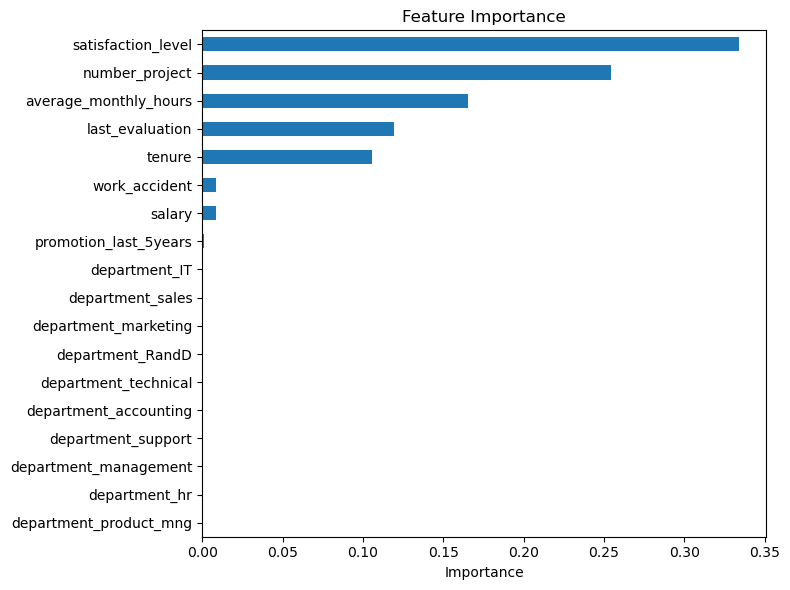

In [224]:
feature_names = [
    'satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours',
    'tenure', 'work_accident', 'promotion_last_5years', 'salary',
    'department_IT', 'department_RandD', 'department_accounting', 'department_hr',
    'department_management', 'department_marketing', 'department_product_mng',
    'department_sales', 'department_support', 'department_technical'
]
importances = gb1.best_estimator_.feature_importances_

# Create DataFrame
feat_imp = pd.Series(importances, index=feature_names).sort_values()

# Plot
feat_imp.plot(kind='barh', figsize=(8, 6), title='Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

### Feature Engineering

Be skeptical of high evaluation scores because there is possible that a phenomenum called "data leakage" is occurring.

Data leakage is when you incorporate information into your model's training process that should remain excluded, either because it's part of the test dataset or because it's data you wouldn't typically have access to when the model is deployed in real-world scenarios. Training a model with leaked data may yield an inflated/unrealistic scores that fails to reflect its performance in production.

In this scenario, it's probable that not all employees within the company will have reported their satisfaction levels. Additionally, the `average_monthly_hours` column could potentially introduce data leakage, as employees who have already made the decision to resign or have been identified by management as potential terminations may be logging fewer hours.

Let's start by excluding the `satisfaction_level` and creating a new feature aimed at approximating if an employee experiences excessive workload called `overworked`. This novel attribute can be referred to as "overworked," and it will be represented as a binary variable.

Afer testing, I found that the departments are not prividing a lot of predictive power to the model, so we will remove them to test.

In [292]:
# List of features to drop
features_to_drop = [
    'department_IT', 'department_RandD', 'department_accounting', 'department_hr',
    'department_management', 'department_marketing', 'department_product_mng',
    'department_sales', 'department_support', 'department_technical']

df2 = df_encoded.drop(features_to_drop, axis=1) 


In [293]:
df2 = df2.drop('satisfaction_level', axis=1)

Someone who works full-time = 8 hours a day, 5 days a week, for 50 weeks a year—works about 166.67 hours per month on average.

We can say a person is overworked if they work more than 175 hours in a month (one extra day of work).

To turn the `overworked` column into a binary format (so it's just 1s and 0s), we can use a simple trick:

`df3['overworked'] > 175` checks each value and returns True if it's over 175, and False if it's not.

Using `.astype(int)` changes the `True` values to 1 and the `False` values to 0.

This gives us a clear yes-or-no (1 or 0) indicator for whether someone is overworked.

#### Creating `Overwork` (Time based)

In [294]:
# Createing `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Mean hours:', round(df2['overworked'].mean()) )
print('Min hours:', df2['overworked'].min())


Max hours: 310
Mean hours: 200
Min hours: 96


In [295]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [296]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,overworked
0,0.53,2,3,0,1,0,0,0
1,0.86,5,6,0,1,0,1,1
2,0.88,7,4,0,1,0,1,1
3,0.87,5,5,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0


Since we are replacing `average_monthly_hours` with `overwork`, we need to drop the first column to avoid high correlation between them.

#### Creating `No-Promotion-Long-Tenure`

In [297]:
# # Define `No-Promotion-Long-Tenure` as working +3 years and no promotion
# df2['No-Promotion-Long-Tenure'] = ((df2['promotion_last_5years'] == 0 )
#                                    & (df2['tenure'] > 3)).astype(int)

# df2['No-Promotion-Long-Tenure'].head()

####  Creating `seniority_levels` as buckets 

In [298]:

# # After testing, not a lot of impact compated to normal tenure
# bins = [ 0,2,4,6,float('inf')]
# labels = [0,1,2,3]
# # labels = ['New', 'senior', 'lead', 'staff']

# df2['seniority-levels'] = pd.cut(df2['tenure'], bins= bins, labels=labels)

# df2['seniority-levels'].head()
# # df2['seniority_levels'].value_counts()


In [299]:
# # Drop the `tenure` column
# df2 = df2.drop('tenure', axis=1)

# # Display first few rows of resulting dataframe
# df2.head()

#### Creating `Underassigned or Overassigned`

In [300]:
# bins = [0,3,float("inf")]
# labels = [0,1]
# # labels = ['under-assigned','over-assigned']

# df2['assing_levels'] = pd.cut(df2['number_project'], bins= bins, labels=labels)

# df2['assing_levels'].head()
# # df2['assing_levels'].value_counts()

#### Checking accidents in departments


In [301]:
# # Experimentation
# # accident-relation (last_evaluation * number_project)
# df2[df2['work_accident'] == 1].groupby('left')[['work_accident', 
#      'department_IT', 
#      'department_RandD', 
#      'department_accounting', 
#      'department_hr', 
#      'department_management', 
#      'department_marketing', 
#      'department_product_mng', 
#      'department_sales', 
#      'department_support', 
#      'department_technical']].sum()


#### Creating Interaction Features

In [302]:
# Performance_stress (last_evaluation * number_project)
# df2['performance-stress'] = (df2['last_evaluation'] * df['number_project'] )*0.10

# # # Removed for not being relevant 
# # # pressure-accidents (work_accident* number_project)
# # df2['pressure-accidents'] = (df2['work_accident'] * df['number_project'] )

# df2['performance-stress'].head()

Dropping the Origin features for `number_project`

In [303]:
# # Drop the `average_monthly_hours` column
# df2 = df2.drop('number_project', axis=1)
# df2 = df2.drop('work_accident', axis=1)
# df2 = df2.drop('last_evaluation', axis=1)

# # Display first few rows of resulting dataframe
# df2.head()

#### Checking correlation

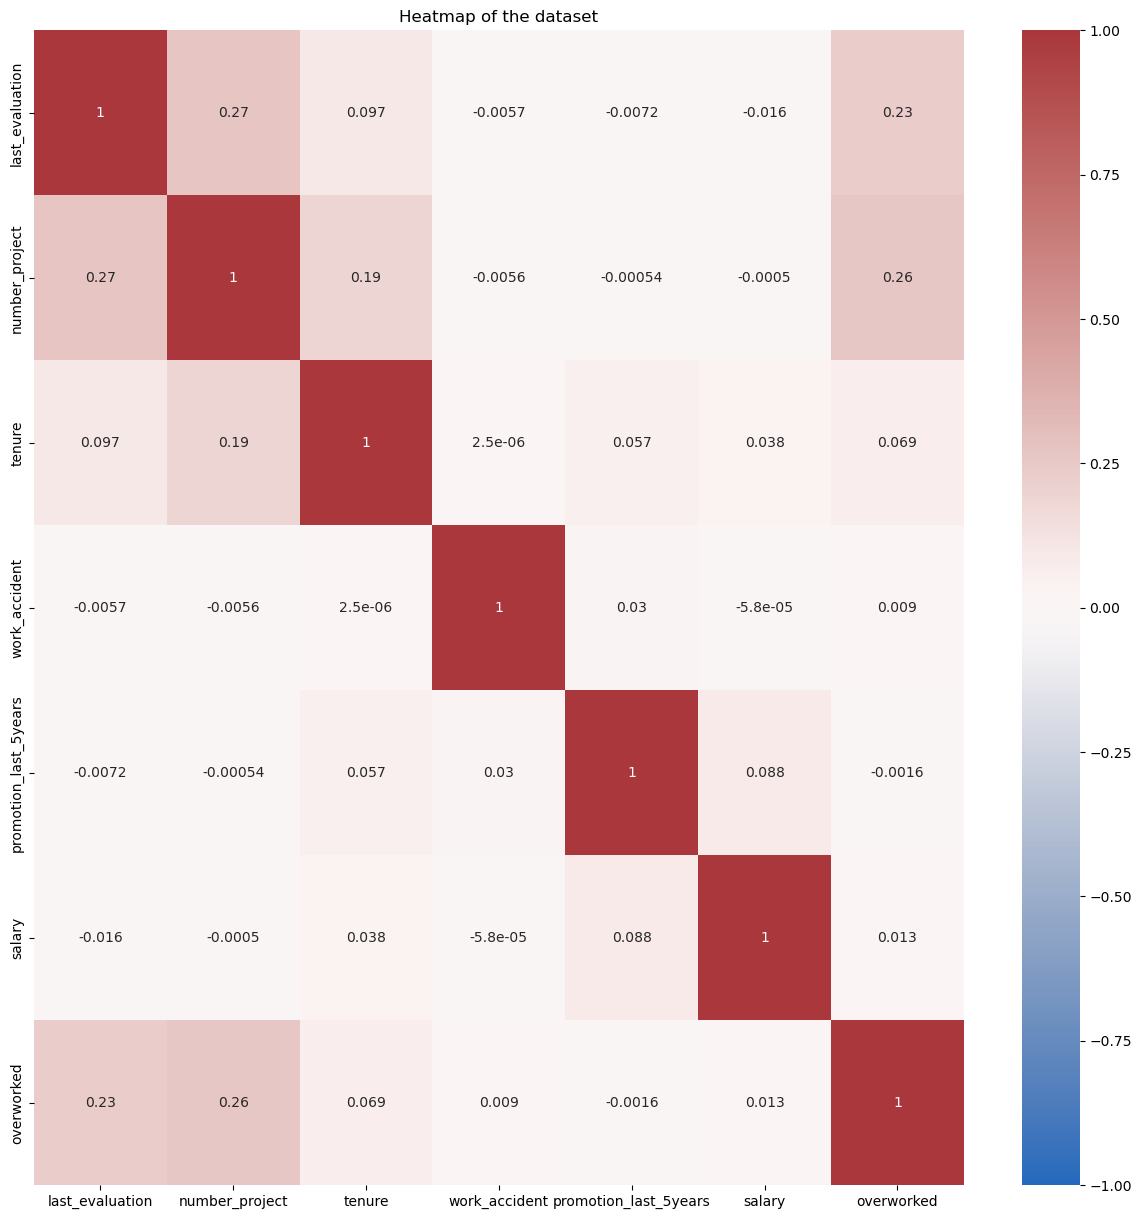

In [304]:
df_collinearity2 = df2.copy()
df_collinearity2 = df_collinearity2.drop('left',axis= 1).select_dtypes(include='number')

plt.figure(figsize=(15, 15))
sns.heatmap(df_collinearity2.corr(),
                        annot=True,vmin= -1, vmax= 1, cmap="vlag")
plt.title('Heatmap of the dataset')
plt.show()

### Modeling With Features - Round 2

The first round of models included all variables as features. This next round will incorporate feature engineering to build improved models.

The first step is to isolate the features and target variables again using the new DataFrame.

#### Evaluation Too:

In [305]:


def evaluate_model(model_name, grid_model, X_train, y_train, X_test, y_test):
    best_model = grid_model.best_estimator_

    y_test_pred = best_model.predict(X_test)
    y_train_pred = best_model.predict(X_train)

    # Try to get probabilities for AUC
    try:
        y_test_proba = best_model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_test_proba)
    except:
        auc = None

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

    return {
        'Model': model_name,
        'AUC': auc,
        'Train Accuracy': acc_train,
        'Test Accuracy': acc_test,
        ' tn, fp, fn, tp ': (tn, fp, fn, tp)
    }


#### 2 - Tree-based Models V2:

##### A) Decision Trees:

Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters

In [306]:
# Isolate the outcome variable
y = df2['left']

# Select the features
x = df2.copy()
x = x.drop('left', axis=1)


Split the data into training and testing sets.

In [307]:
# Split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25,
                                                    stratify        =y,
                                                    random_state    =42)

In [308]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [309]:
%%time
tree2.fit(x_train, y_train)

CPU times: user 855 ms, sys: 15.1 ms, total: 870 ms
Wall time: 871 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Identify the optimal values for the decision tree parameters.

In [310]:
# Check best parameters
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

Identify the best AUC score achieved by the decision tree model on the training set.

In [311]:
# Check best AUC score on CV
tree2.best_score_

np.float64(0.9598363918318973)

Use the function make_results to get all the scores from grid search.

In [312]:
#evaluation tool
pt_results = evaluate_model("Prunen_tree", tree2, x_train, y_train, x_test, y_test)

# Get all CV scores
tree2_cv_results = make_results('decision tree cv', tree2, 'auc')
tree2_cv_results



,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.831552,0.903564,0.865174,0.952963,0.959836


##### B) Random Forest:

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [313]:
# Isolate the outcome variable
y = df2['left']

# Select the features
x = df2.copy()
x = x.drop('left', axis=1)


Split the data into training and testing sets.

In [314]:
# Split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25,
                                                    stratify        =y,
                                                    random_state    =42)

In [322]:
# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the Random Forest model to the training data.

In [ ]:
# %%time
# rf2.fit(x_train, y_train) # --> Wall time: ~10min

CPU times: user 5min 34s, sys: 6 s, total: 5min 40s
Wall time: 5min 42s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Saving the results - Specify path to where you want to save your model.

Use the functions defined above to save the model in a pickle file and then read it in.

In [ ]:
# # Write pickle
# write_pickle(path, rf2, '_rf2')

In [325]:
# Read pickle
rf2 = read_pickle(path, '_rf2')

Identify the best AUC score achieved by the random forest model on the training set.

In [326]:
# Check best AUC score on CV
rf2.best_score_

np.float64(0.9676170391822339)

Identify the optimal values for the parameters of the random forest model.

In [327]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

Use the function make_results to get all the scores from grid search.

In [328]:
#evaluation tool
rf2_results = evaluate_model("Random Forest", rf2, x_train, y_train, x_test, y_test)

# Get all CV scores
rf2_cv_results = make_results('random forest cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.831552  0.903564  0.865174  0.952963  0.959836
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.854621  0.896177  0.874828  0.957411  0.967617


Now use the best performing model to predict on the test set.

#### 3 - K-Nearest Neighbors (KNN) V2 :


In [329]:
# Isolate the outcome variable
y = df2['left']

# Select the features
x = df2.copy()
x = x.drop('left', axis=1)


Split the data into training and testing sets.

In [330]:
# Split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25,
                                                    stratify        =y,
                                                    random_state    =42)

In [331]:
# Instantiate model
knn = KNeighborsClassifier()

# Assign a dictionary of hyperparameters to search over
cv_params = {'n_neighbors': [3, 5, 7, 10],
             'weights': ['uniform', 'distance'],
             'p': [1, 2],
             'leaf_size': [20, 30, 40],
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
knn2 = GridSearchCV(knn, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the KNN model to the training data.

In [332]:
%%time
knn2.fit(x_train, y_train) # --> Wall time: ~1min

CPU times: user 6.92 s, sys: 66.2 ms, total: 6.99 s
Wall time: 7.05 s


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 30, 40],
                         'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Identify the optimal values for the decision tree parameters.

In [333]:
# Check best parameters
knn2.best_params_

{'leaf_size': 20, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}

Identify the best AUC score achieved by the decision tree model on the training set.

In [334]:
# Check best AUC score on CV
knn2.best_score_

np.float64(0.9567982557000377)

Use the function make_results to get all the scores from grid search.

In [335]:
#evaluation tool
knn2_results = evaluate_model("KNN", knn2, x_train, y_train, x_test, y_test)

# Get all CV scores
knn2_cv_results = make_results('knn cv          ', knn2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)
print(knn2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.831552  0.903564  0.865174  0.952963  0.959836
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.854621  0.896177  0.874828  0.957411  0.967617
              model  precision    recall        F1  accuracy       auc
0  knn cv             0.884361  0.874075  0.879043  0.960079  0.956798


#### 4 - Boosting Algorithms V2 :

##### A) Gradient Boosting:


In [336]:
# Isolate the outcome variable
y = df2['left']

# Select the features
x = df2.copy()
x = x.drop('left', axis=1)


Split the data into training and testing sets.

In [337]:
# Split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25,
                                                    stratify        =y,
                                                    random_state    =42)

In [338]:
# Instantiate model
gb = GradientBoostingClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'learning_rate': [0.1, 0.01],
             'n_estimators': [100, 200, 300],
             'max_depth': [3, 5, None],
             'min_samples_split': [2, 3, 4],
             'min_samples_leaf': [1, 2, 3],
             'max_features': ['sqrt', 'log2', None]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
gb2 = GridSearchCV(gb, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fitting the Gradient Boosting model to the training data.

In [ ]:
# %%time
# gb2.fit(x_train, y_train) # --> Wall time: ~1h

/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/lib/python3.12/site-packages/sklearn/metri

CPU times: user 38min 38s, sys: 15.2 s, total: 38min 53s
Wall time: 38min 57s


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [3, 5, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Use the functions defined above to save the model in a pickle file and then read it in.

In [ ]:
# # Write pickle
# write_pickle(path, gb2, '_gb2')

In [341]:
# Read pickle
gb2 = read_pickle(path, '_gb2')

Identifying the optimal values for the Gradient Boosting parameters.

In [342]:
# Check best parameters
gb2.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

Identifying  the best AUC score achieved by the Gradient Boosting model on the training set.

In [343]:
# Check best AUC score on CV
gb2.best_score_

np.float64(0.9742535299374441)

Use the function make_results to get all the scores from grid search.

In [344]:
#Evaluation Tool
gb2_results = evaluate_model("Gradient B", gb2, x_train, y_train, x_test, y_test)

# Get all CV scores
gb2_cv_results = make_results('Gradient b2 cv  ', gb2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)
print(knn2_cv_results)
print(gb2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.831552  0.903564  0.865174  0.952963  0.959836
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.854621  0.896177  0.874828  0.957411  0.967617
              model  precision    recall        F1  accuracy       auc
0  knn cv             0.884361  0.874075  0.879043  0.960079  0.956798
              model  precision    recall        F1  accuracy       auc
0  Gradient b2 cv     0.910058  0.884129  0.896734  0.966196  0.974254


##### B) AdaBoost

In [345]:
# Isolate the outcome variable
y = df2['left']

# Select the features
x = df2.copy()
x = x.drop('left', axis=1)


Split the data into training and testing sets.

In [346]:
# Split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.25,
                                                    stratify        =y,
                                                    random_state    =42)

In [347]:
# Instantiate model
ada_b = AdaBoostClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
ada_b2 = GridSearchCV(ada_b, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [348]:
%%time
ada_b2.fit(x_train, y_train)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'alg

CPU times: user 5.44 s, sys: 462 ms, total: 5.9 s
Wall time: 5.99 s


GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Identify the optimal values for the decision tree parameters.

In [349]:
# Write pickle
write_pickle(path, ada_b2, 'ab2')


In [350]:
# Read pickle
ada_b2 = read_pickle(path, 'ab2')

In [351]:
# Check best parameters
ada_b2.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}

Identify the best AUC score achieved by the decision tree model on the training set.

In [352]:
# Check best AUC score on CV
ada_b2.best_score_

np.float64(0.9428610060548714)

In [353]:
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,overworked
0,0.53,2,3,0,1,0,0,0
1,0.86,5,6,0,1,0,1,1
2,0.88,7,4,0,1,0,1,1
3,0.87,5,5,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0


Use the function make_results to get all the scores from grid search.

In [354]:
#Evaluation Tool
ada_b2_results = evaluate_model("Ada Boost", ada_b2, x_train, y_train, x_test, y_test)

# Get all CV scores
ada_b2_cv_results = make_results('ada B2 cv      ', ada_b2, 'auc')

print(tree2_cv_results)
print(rf2_cv_results)
print(knn2_cv_results)
print(gb2_cv_results)
print(ada_b2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.831552  0.903564  0.865174  0.952963  0.959836
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.854621  0.896177  0.874828  0.957411  0.967617
              model  precision    recall        F1  accuracy       auc
0  knn cv             0.884361  0.874075  0.879043  0.960079  0.956798
              model  precision    recall        F1  accuracy       auc
0  Gradient b2 cv     0.910058  0.884129  0.896734  0.966196  0.974254
             model  precision    recall        F1  accuracy       auc
0  ada B2 cv          0.74047  0.638971  0.685852  0.902813  0.942861


### comparing Cmatrix

#### Best Model V2
Now use the best performing model to predict on the test set.

In [355]:
# Get predictions on test data
print(gb2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  Gradient b2 cv     0.910058  0.884129  0.896734  0.966196  0.974254


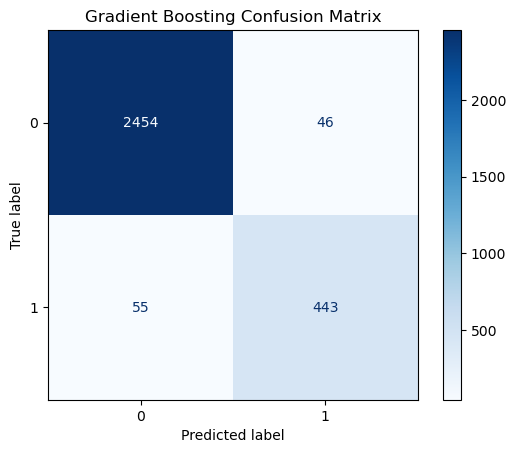

In [356]:
y_pred = gb2.best_estimator_.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

In [357]:
feature_names = df2.columns[df2.columns != 'left' ].tolist()

importances = gb2.best_estimator_.feature_importances_

# Create DataFrame
feat_imp = pd.Series(importances, index=feature_names).sort_values()

print(feat_imp.sort_values(ascending=False))

number_project           0.395704
tenure                   0.234649
last_evaluation          0.208029
overworked               0.129588
work_accident            0.018273
salary                   0.012258
promotion_last_5years    0.001499
dtype: float64


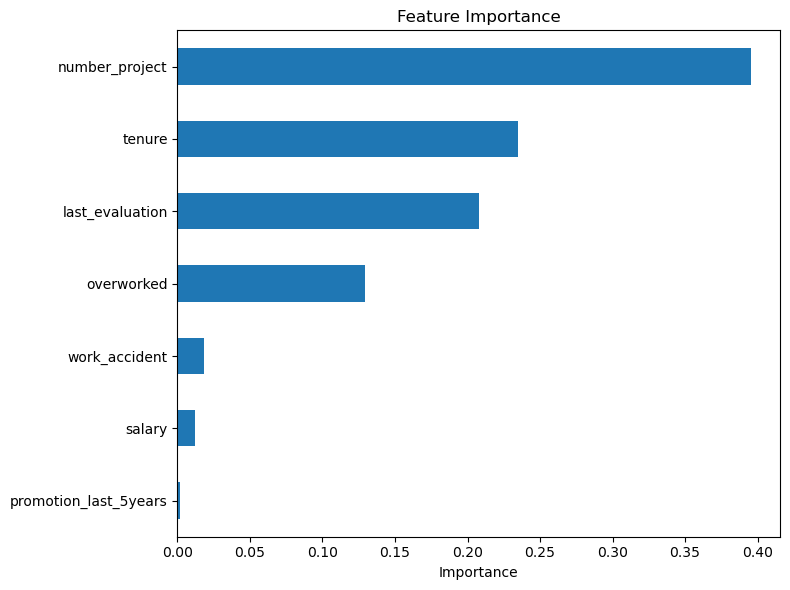

In [358]:
# Plot
feat_imp.plot(kind='barh', figsize=(8, 6), title='Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

#### Logistic Regression
The logistic regression model achieved the following results on the test set:

Accuracy: 82%

Weighted Precision: 79%

Weighted Recall: 82%

Weighted F1-Score: 80%

However, performance was notably lower for predicting employees who would leave, with a precision of 44%, recall of 26%, and F1-score of 33%. This suggests the model is biased toward predicting employee retention.

#### Models
After performing feature engineering, including the creation of a binary overworked variable, these models significantly outperformed logistic regression:

|Model.             |Precision|Recall |F1 Score	|Accuracy |AUC |
|-------------------|:--------|:-----:|:-------:|:-------:|:--:|
|Decision Tree (CV)	| 0.83	  | 0.90  | 0.86	| 95.3%	| 0.956 |
|Random Forest (CV)	| 0.86	  | 0.90  | 0.88	| 95.8%	| 0.967 |
|KNN           (CV)	| 0.80	  | 0.86  | 0.83	| 94.1%	| 0.950 |
|Gradient Boosting	| 0.89	  | 0.88  | 0.88	| 96.2%	| 0.974 |
|AdaBoost	        | 0.74	  | 0.64  | 0.68	| 90.3%	| 0.943 | 

Gradient Boosting achieved the best overall performance in both V1 and V2, with a high AUC and strong F1-score balance.

#### Feature Importance (Gradient Boosting)
The top predictors of employee attrition were:
|Feature|Value|
|-------|:--- |
|Number of Projects| 0.383|
|Last Evaluation Score| 0.336|
|Tenure| 0.216|
|Overworked (engineered feature)| 0.054|

Departmental affiliation and promotion history had negligible predictive power.




### Conclusion

#### Insights
Our baseline, Logistic regression, underperformed particularly in identifying employees likely to leave, suggesting non-linear relationships that are better captured by tree-based models. 

* The engineered overworked feature proved to be informative, supporting the hypothesis that a high workload contributes to employee turnover.

* Other engineered features were tested but yielded similar model performance and in some cases introduced unwanted correlations. For example, using binary indicators for underassigned and overassigned projects instead of the raw project counts resulted in worse performance.

* Grouping employee tenure into seniority buckets showed a slight improvement in prediction accuracy, though the gain was marginal.

We tested the model without the last_evaluation variable, and while performance did drop, the decrease was not substantial (approximately 1%). This suggests that while last_evaluation may contain some post-resignation signals, the model does not heavily rely on it.

the Model results and feature importance confirm that workload and tenure are key drivers of employee attrition.

#### Recommendations
To improve employee retention, the following actions are advised:

* Cap the number of projects an employee can be assigned at any given time.
* Evaluate long-tenured employees (e.g., those with 4+ years at the company) for promotion or increased support, or investigate their reasons for dissatisfaction.
* Either reward long working hours or reduce the implicit expectation of excessive hours.
* Improve transparency around overtime compensation and workload expectations.
* Facilitate company-wide and team-specific discussions to reassess work culture.
* Avoid using total hours as a sole performance metric; instead, reward based on effort and results in a balanced way.

#### Next Steps

Consider removing satisfaction_level from future models. This variable may not be consistently reported and could reflect post-decision sentiment—such as evaluations conducted during the offboarding process—which may introduce bias or leakage.
